In [44]:
import sys
from pathlib import Path

sys.path.append(str(Path(sys.argv[0]).absolute().parent.parent.parent.parent))
# add the entire folder to path


In [45]:
from src.utils import utils
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np


In [46]:
now = datetime.now().strftime("%Y-%m-%d")
print(now)


2022-12-20


In [47]:
# we should use the date of the raw file
now = "2022-10-26"
raw_path = f"../data/raw/{now}_hiscore_data.parquet.gzip"
save_path = f"../data/calculated/{now}"


In [48]:
df = pd.read_parquet(raw_path)
df.head()


,name,created_at,updated_at,possible_ban,confirmed_ban,label_id,label,account_status,id,timestamp,...,tombs_of_amascut,tombs_of_amascut_expert,tzkal_zuk,tztok_jad,venenatis,vetion,vorkath,wintertodt,zalcano,zulrah
Player_id,,,,,,,,,,,,,,,,,,,,,
1,3BA604236FB0319D5937E31388B0C64C,2021-03-14 20:22:45,2022-12-19 05:02:57,0,0,1,Real_Player,not banned,59568395,2022-12-19 05:04:16,...,0.0,0.0,0,0,0,0,0,0,0,0
8,5A02B5A7F38AD2623A9C5E68DF01EC2F,2021-03-14 20:42:37,2022-12-19 00:36:08,0,0,1,Real_Player,not banned,59622273,2022-12-19 00:36:09,...,0.0,0.0,0,10,0,0,114,73,0,1256
29,59DCFCAFC1F3DF3326F36E7A39B741FC,2021-03-14 22:17:16,2022-12-19 14:49:19,0,0,1,Real_Player,not banned,292513577,2022-12-19 14:49:20,...,0.0,0.0,0,0,0,0,0,0,0,0
39,1C74EFD6CE51790D7BF65A94F47675B5,2021-03-14 22:17:23,2022-12-19 17:46:42,0,0,1,Real_Player,not banned,59503415,2022-12-19 17:46:53,...,235.0,0.0,0,0,0,0,279,1526,145,0
59,E666957B20A95519E6306D75FEC4DE19,2021-03-14 22:17:40,2022-12-19 01:23:32,1,0,1,Real_Player,not banned,59615490,2022-07-27 06:41:21,...,0.0,0.0,0,20,0,0,1000,500,0,400


# optimizing dataframe

In [49]:
import numpy as np

df[utils.SKILLS] = (
    df[utils.SKILLS].abs().astype(np.uint32)
)  # Unsigned integer (0 to 4_294_967_295)
df[utils.MINIGAMES] = (
    df[utils.MINIGAMES].abs().astype(np.uint16)
)  # Unsigned integer (0 to 65_535)
df[utils.BOSSES] = (
    df[utils.BOSSES].abs().astype(np.uint16)
)  # Unsigned integer (0 to 65_535)
df["total"] = (
    df[utils.SKILLS].sum(axis=1).abs().astype(np.uint64)
)  # Unsigned integer (0 to 18_446_744_073_709_551_615)


# skill ratio's

In [50]:
df_skill_features = utils.get_ratio(df, utils.SKILLS)
df_skill_features.describe()


,attack_ratio,defence_ratio,strength_ratio,hitpoints_ratio,ranged_ratio,prayer_ratio,magic_ratio,cooking_ratio,woodcutting_ratio,fletching_ratio,...,smithing_ratio,mining_ratio,herblore_ratio,agility_ratio,thieving_ratio,slayer_ratio,farming_ratio,runecraft_ratio,hunter_ratio,construction_ratio
count,285884.000000,285884.000000,285884.000000,285884.000000,285884.000000,285884.000000,285884.000000,285884.000000,285884.000000,285884.000000,...,285884.000000,285884.000000,285884.000000,285884.000000,285884.000000,285884.000000,285884.000000,285884.000000,285884.000000,285884.000000
mean,0.057459,0.049101,0.077774,0.092468,0.072640,0.029416,0.098534,0.043002,0.046601,0.036469,...,0.052182,0.046528,0.016017,0.029241,0.019533,0.017339,0.020300,0.018103,0.027117,0.010053
std,0.068699,0.060696,0.089831,0.077414,0.103004,0.087401,0.192100,0.094273,0.125784,0.130129,...,0.176304,0.133775,0.078077,0.112240,0.076005,0.025008,0.041966,0.078728,0.118461,0.027205
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004690,0.001845,0.005105,0.014057,0.000011,0.000370,0.000900,0.000196,0.000470,0.000000,...,0.000034,0.000203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.041177,0.036388,0.059270,0.088081,0.034507,0.011365,0.045716,0.014780,0.013914,0.003499,...,0.007541,0.010639,0.001547,0.008099,0.002691,0.002035,0.000236,0.000370,0.000240,0.000709
75%,0.077293,0.066115,0.109192,0.145310,0.106666,0.025078,0.082437,0.046418,0.037407,0.026228,...,0.022991,0.030080,0.016432,0.020482,0.014682,0.031592,0.027333,0.008381,0.014613,0.013369
max,1.000000,1.000000,1.000000,0.857993,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
df_skill_features.to_parquet(
    f"{save_path}_skill_ratios.parquet.gzip", compression="gzip"
)


# boss ratio's

In [52]:
df_boss_features = utils.get_ratio(df, utils.BOSSES)
df_boss_features.describe()


,abyssal_sire_ratio,alchemical_hydra_ratio,barrows_chests_ratio,bryophyta_ratio,callisto_ratio,cerberus_ratio,chambers_of_xeric_ratio,chambers_of_xeric_challenge_mode_ratio,chaos_elemental_ratio,chaos_fanatic_ratio,...,tombs_of_amascut_ratio,tombs_of_amascut_expert_ratio,tzkal_zuk_ratio,tztok_jad_ratio,venenatis_ratio,vetion_ratio,vorkath_ratio,wintertodt_ratio,zalcano_ratio,zulrah_ratio
count,128786.000000,128786.000000,128786.000000,128786.000000,128786.000000,128786.000000,128786.000000,128786.000000,128786.00000,128786.000000,...,128786.000000,128786.000000,128786.000000,128786.000000,128786.000000,128786.000000,128786.000000,128786.000000,128786.000000,128786.000000
mean,0.009000,0.018553,0.077059,0.021007,0.007864,0.018720,0.013298,0.000962,0.00367,0.003524,...,0.001238,0.000493,0.000684,0.000887,0.011253,0.002387,0.075107,0.171985,0.027586,0.080726
std,0.025893,0.050949,0.187986,0.126133,0.059809,0.043174,0.060440,0.007021,0.02803,0.029653,...,0.008864,0.006159,0.025121,0.017666,0.075278,0.026680,0.177973,0.303200,0.135117,0.211402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022411,0.000000,0.000000
75%,0.000000,0.000000,0.051651,0.000000,0.000000,0.012303,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055210,0.152595,0.000000,0.059259
max,0.887097,0.985938,1.000000,1.000000,1.000000,0.794465,1.000000,1.000000,1.00000,1.000000,...,1.000000,0.988372,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
df_boss_features.to_parquet(f"{save_path}_boss_ratios.parquet.gzip", compression="gzip")


# minigame ratio's

In [54]:
df_minigames_features = utils.get_ratio(df, utils.MINIGAMES)
df_minigames_features.describe()


,league_ratio,bounty_hunter_hunter_ratio,bounty_hunter_rogue_ratio,lms_rank_ratio,soul_wars_zeal_ratio,cs_all_ratio,cs_beginner_ratio,cs_easy_ratio,cs_medium_ratio,cs_hard_ratio,cs_elite_ratio,cs_master_ratio
count,139701.0,139701.000000,139701.000000,139701.000000,139701.000000,139701.000000,139701.000000,139701.000000,139701.000000,139701.000000,139701.000000,139701.000000
mean,0.0,0.015398,0.008521,0.153417,0.109116,0.327176,0.091200,0.072343,0.097137,0.095960,0.019359,0.010374
std,0.0,0.101988,0.069315,0.315752,0.272019,0.214876,0.194985,0.142078,0.139620,0.126220,0.050518,0.034301
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.062620,0.000000,0.000000,0.000497,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.500000,0.008415,0.020488,0.053571,0.045366,0.000000,0.000000
75%,0.0,0.000000,0.000000,0.000000,0.000000,0.500000,0.082945,0.086207,0.135329,0.158635,0.022727,0.006654
max,0.0,1.000000,1.000000,1.000000,1.000000,0.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
df_minigames_features.to_parquet(
    f"{save_path}_minigame_ratios.parquet.gzip", compression="gzip"
)


# player data

In [56]:
player_columns = [
    "name",
    "created_at",
    "updated_at",
    "possible_ban",
    "confirmed_ban",
    "label_id",
    "label",
    "account_status",
]

df_player = df.loc[:, player_columns].copy()
df_player["bot"] = np.where(df_player["account_status"] == "banned", 1, 0)
df_player["account_type"] = np.where(df_player["bot"] == 1, "Bot", "Human")
df_player.head()


,name,created_at,updated_at,possible_ban,confirmed_ban,label_id,label,account_status,bot,account_type
Player_id,,,,,,,,,,
1,3BA604236FB0319D5937E31388B0C64C,2021-03-14 20:22:45,2022-12-19 05:02:57,0,0,1,Real_Player,not banned,0,Human
8,5A02B5A7F38AD2623A9C5E68DF01EC2F,2021-03-14 20:42:37,2022-12-19 00:36:08,0,0,1,Real_Player,not banned,0,Human
29,59DCFCAFC1F3DF3326F36E7A39B741FC,2021-03-14 22:17:16,2022-12-19 14:49:19,0,0,1,Real_Player,not banned,0,Human
39,1C74EFD6CE51790D7BF65A94F47675B5,2021-03-14 22:17:23,2022-12-19 17:46:42,0,0,1,Real_Player,not banned,0,Human
59,E666957B20A95519E6306D75FEC4DE19,2021-03-14 22:17:40,2022-12-19 01:23:32,1,0,1,Real_Player,not banned,0,Human


# look at skill ratio real vs bots

In [57]:
def compare_ratio(ratio: str, _df: pd.DataFrame):
    sns.set_style("darkgrid")
    plt.figure(figsize=(12, 5))
    plt.xlabel(f"{ratio}")

    sns.histplot(
        data=_df,
        x=ratio,
        binwidth=0.01,
        hue="account_type",
    ).set_title(f"Bins of real player & bots compared to {ratio}")

    plt.show()


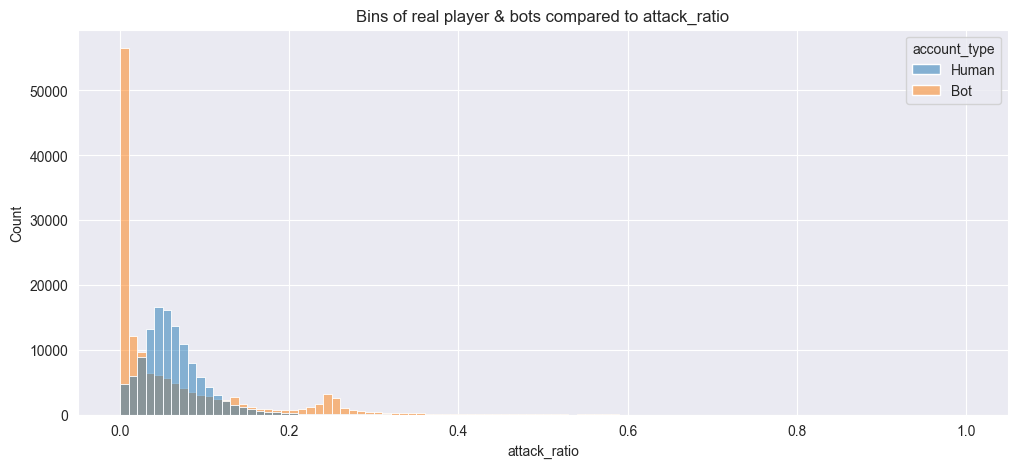

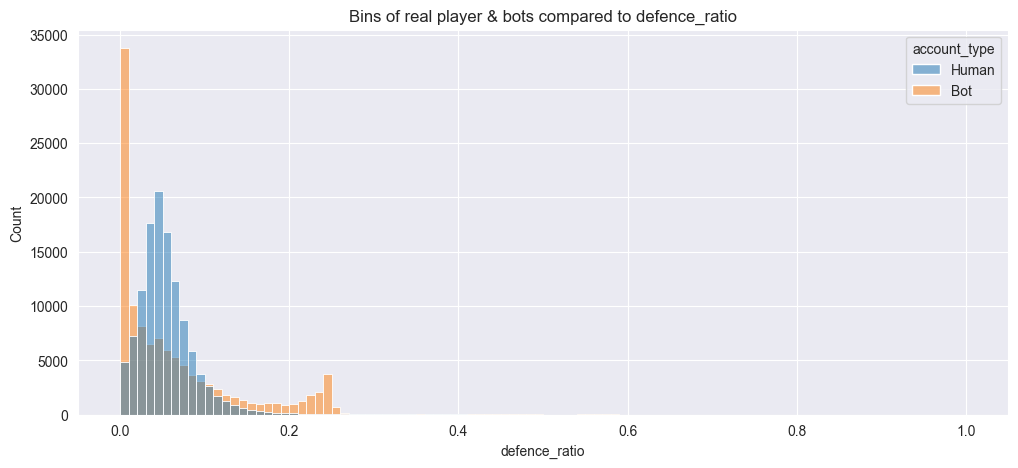

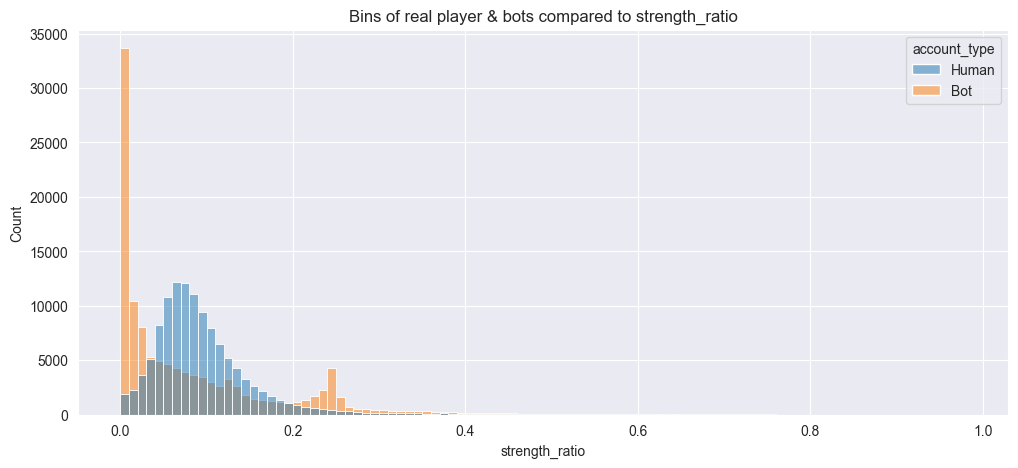

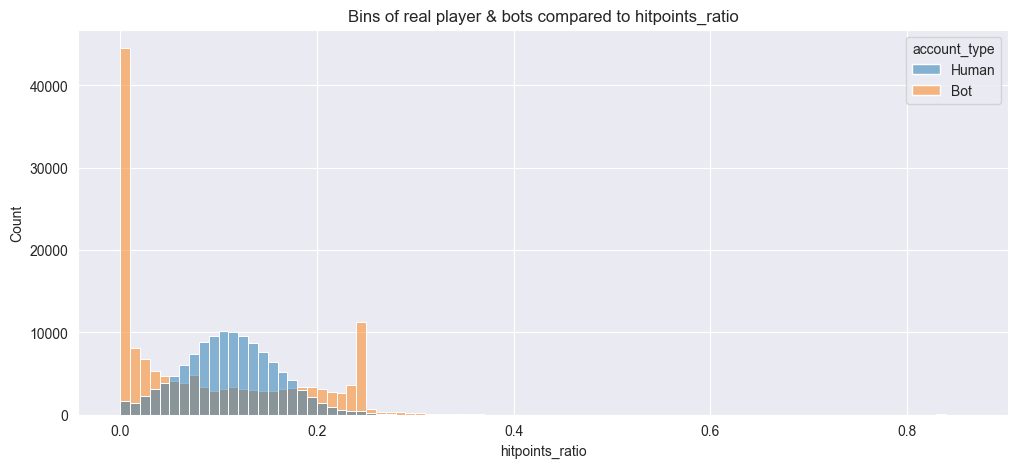

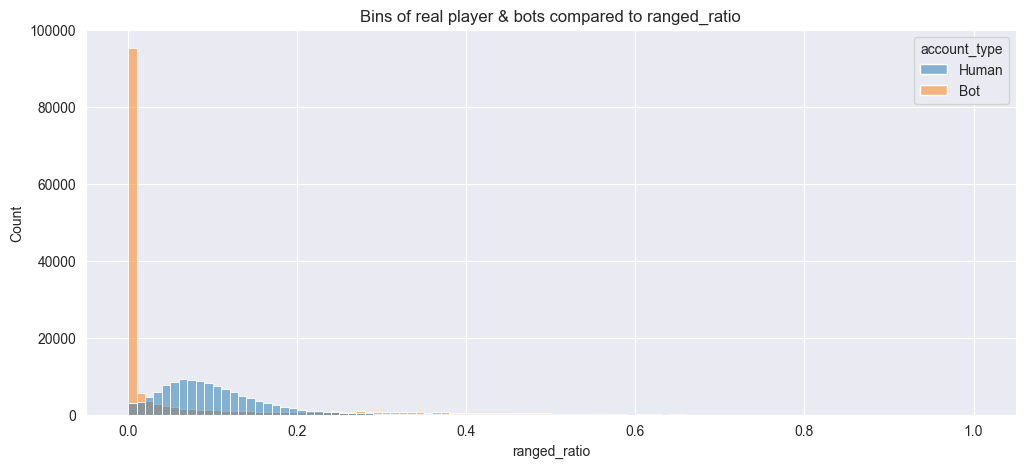

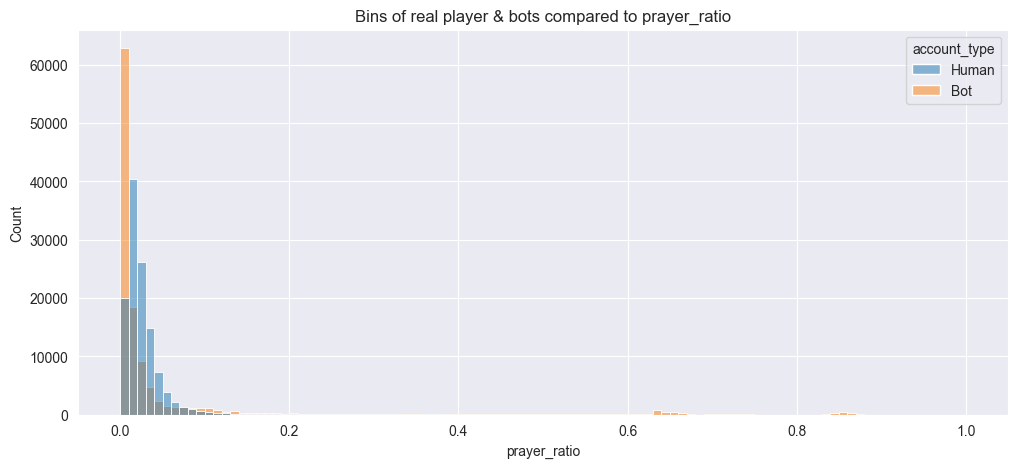

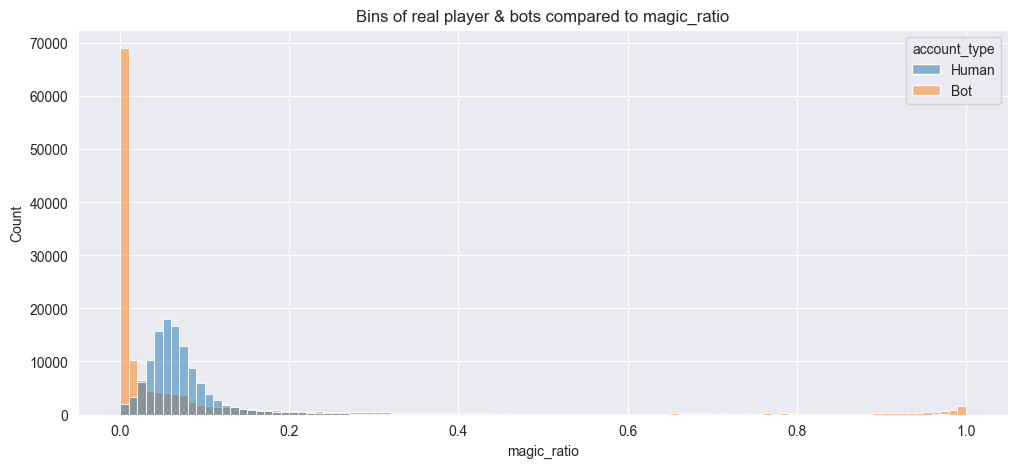

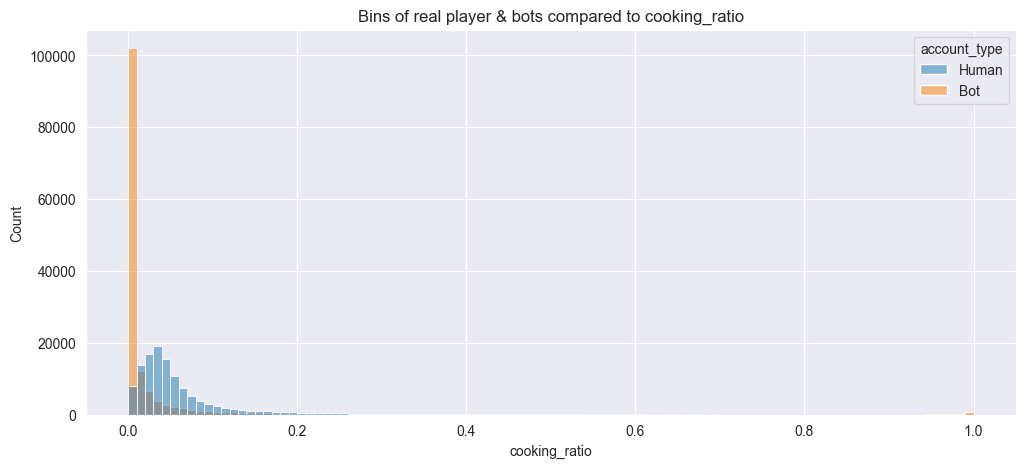

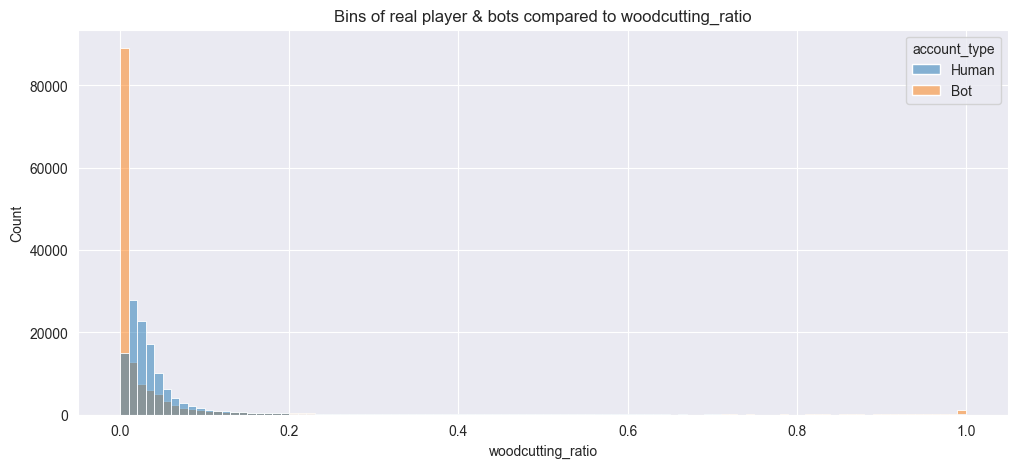

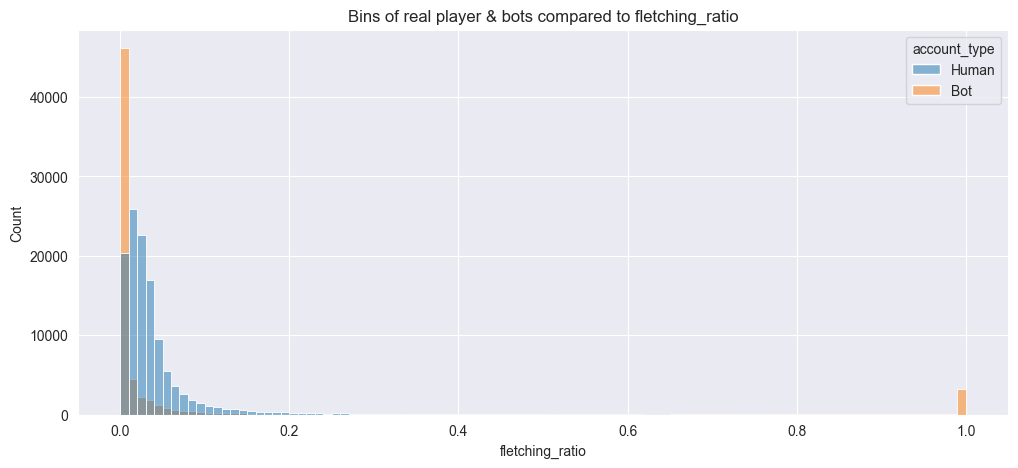

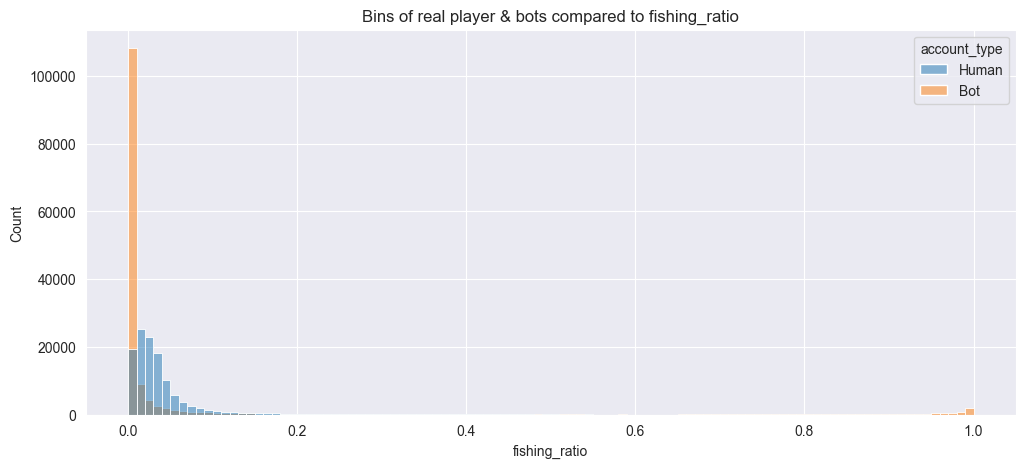

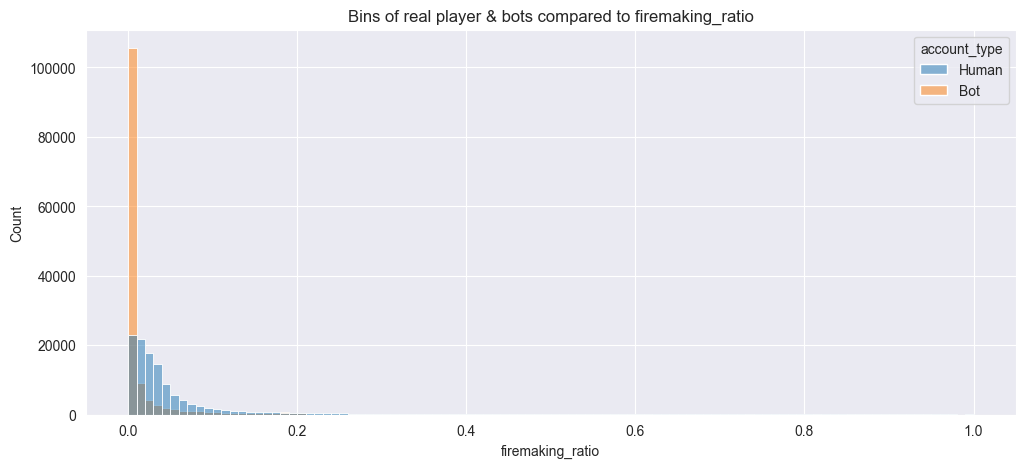

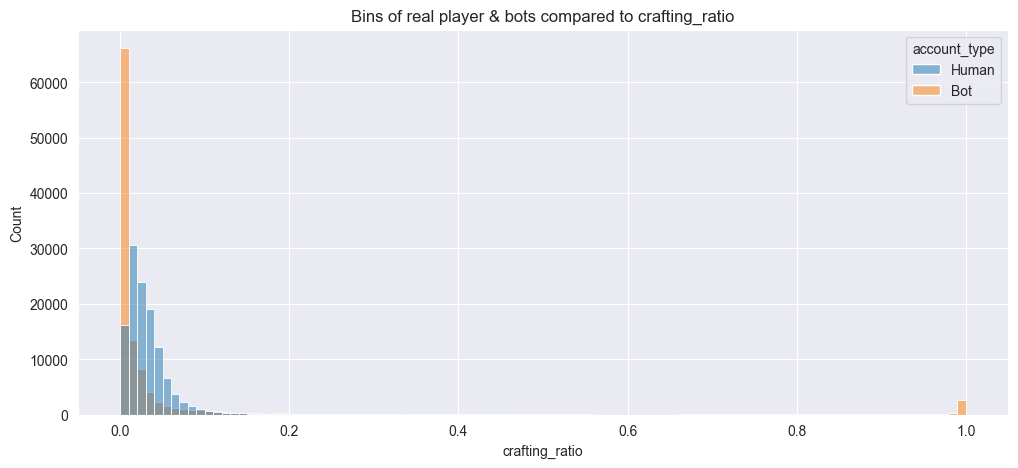

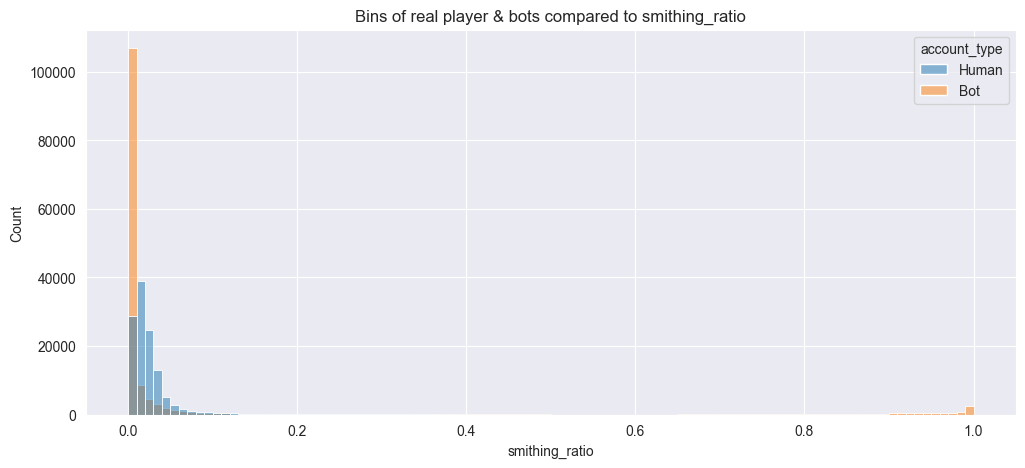

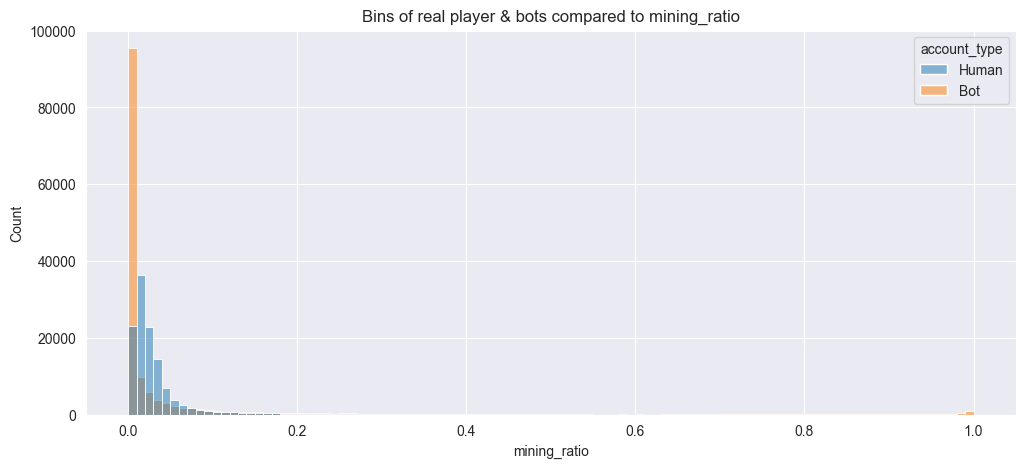

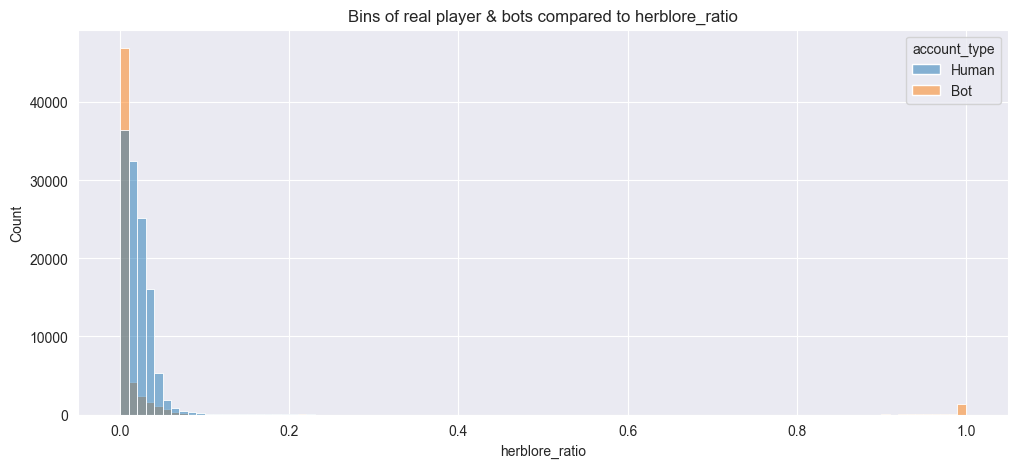

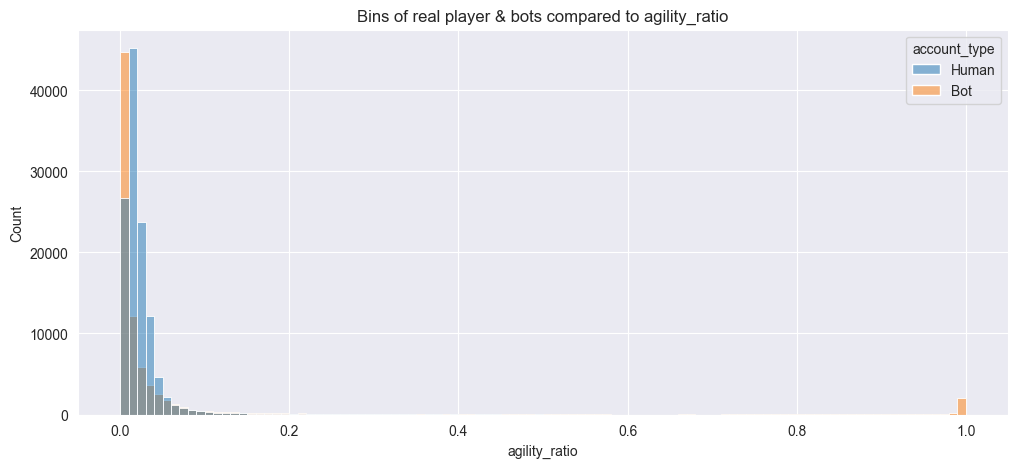

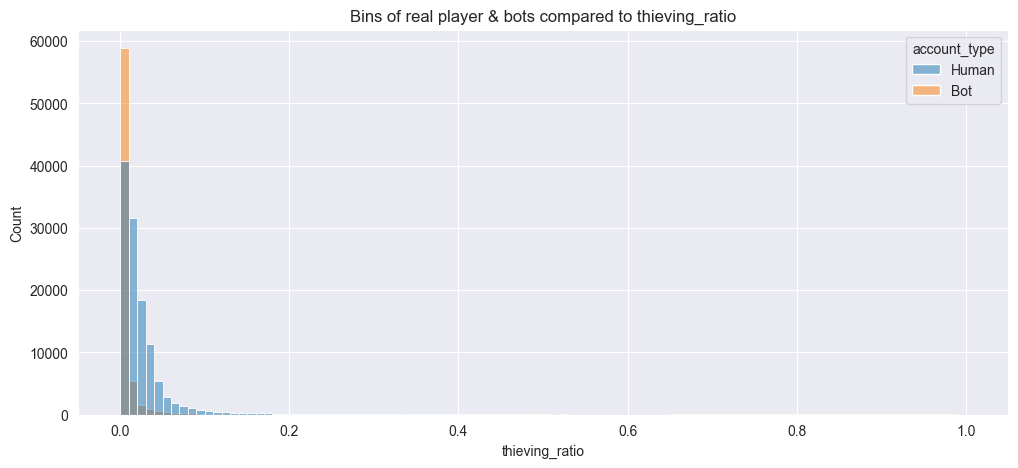

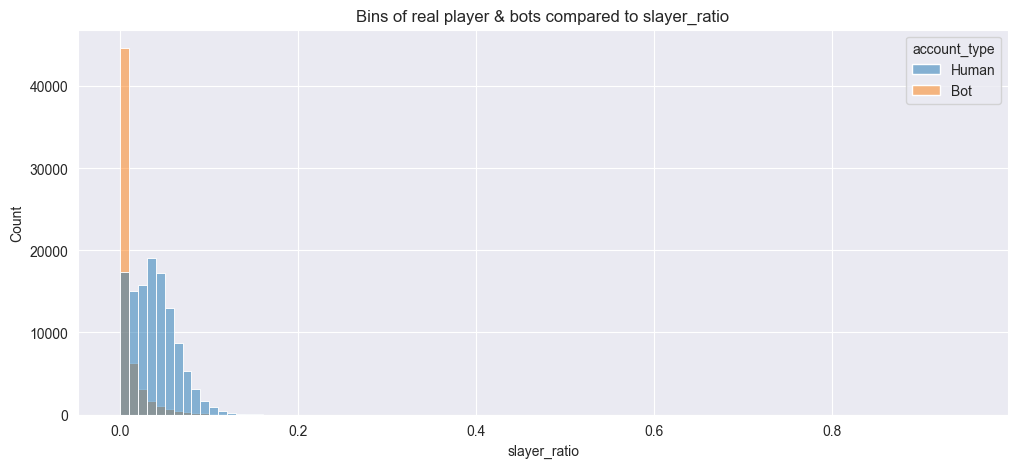

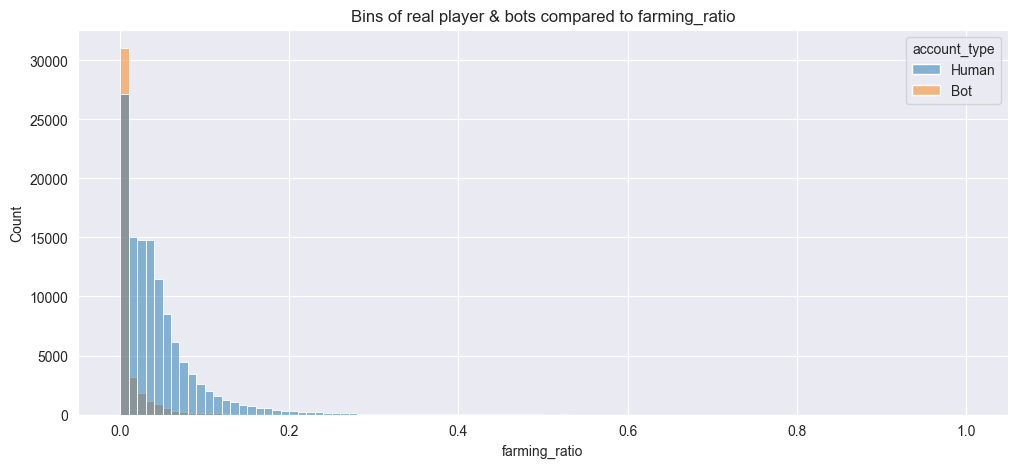

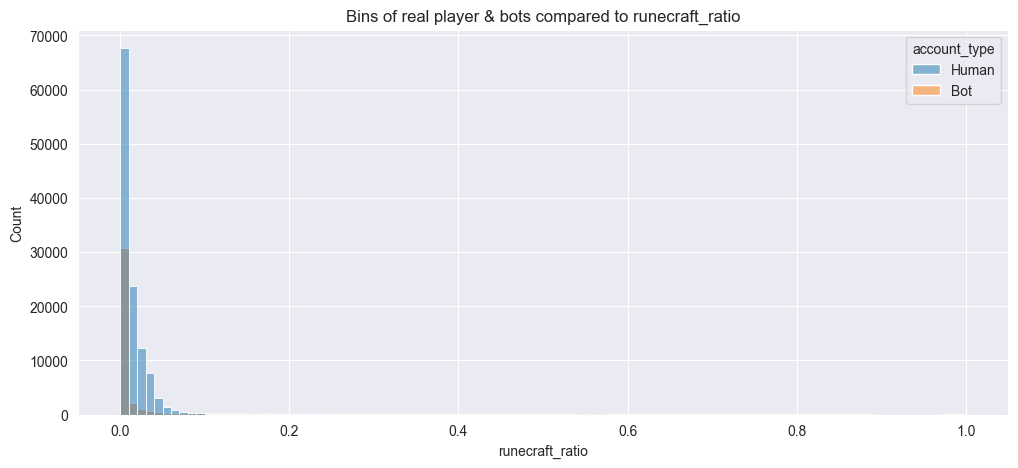

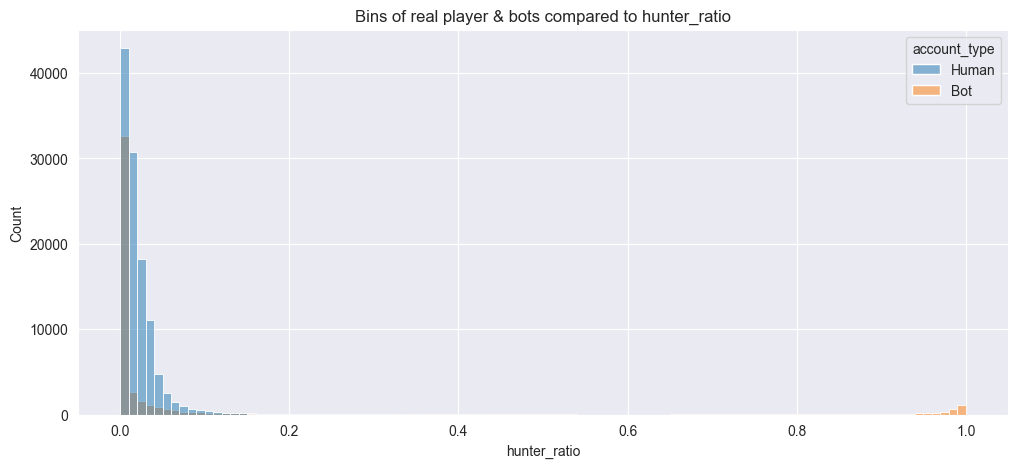

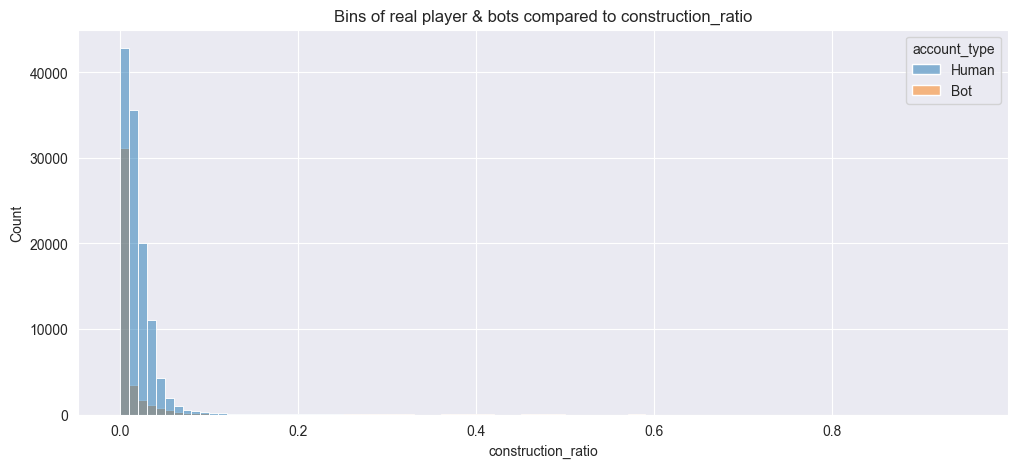

In [58]:
_df = df_player.merge(df_skill_features, left_index=True, right_index=True).copy()
for skill_ratio in df_skill_features.columns:
    if "_ratio" not in skill_ratio:
        continue
    query = f"{skill_ratio} > 0 and {skill_ratio} < 1"
    compare_ratio(skill_ratio, _df.query(query).copy())


# look at boss ratio real vs bots

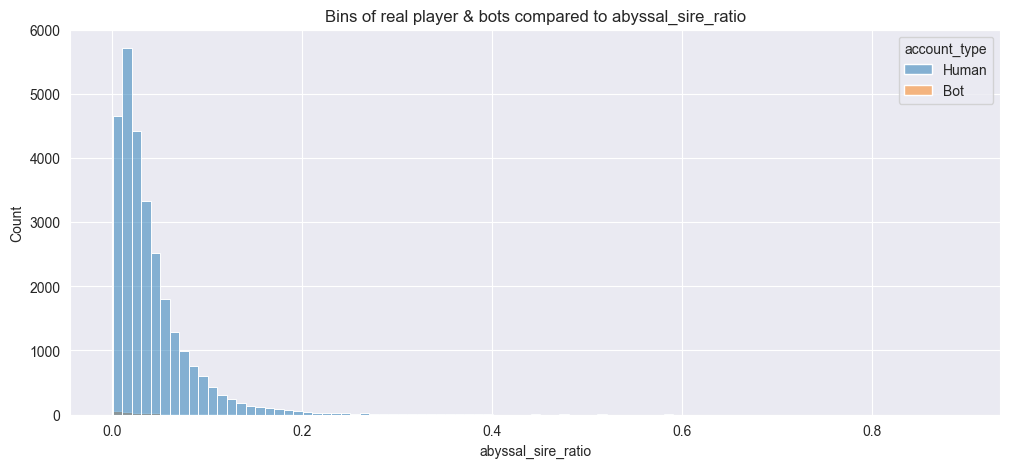

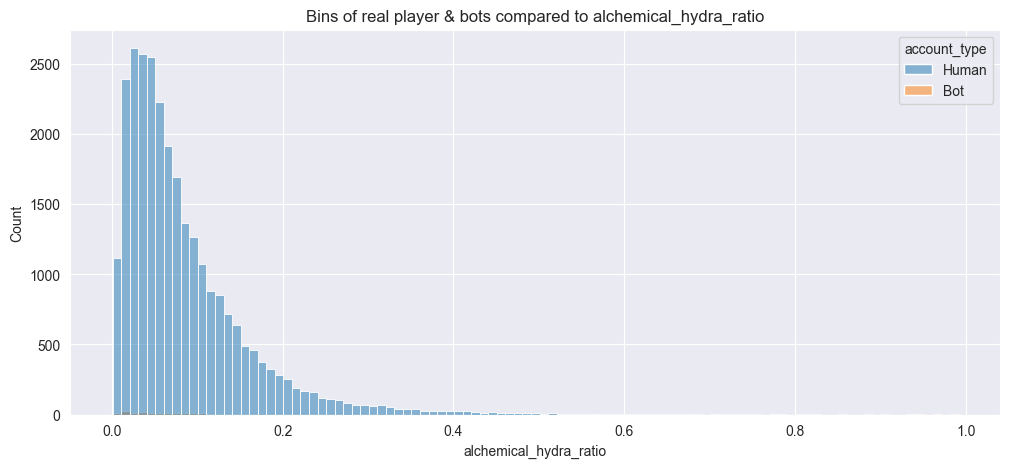

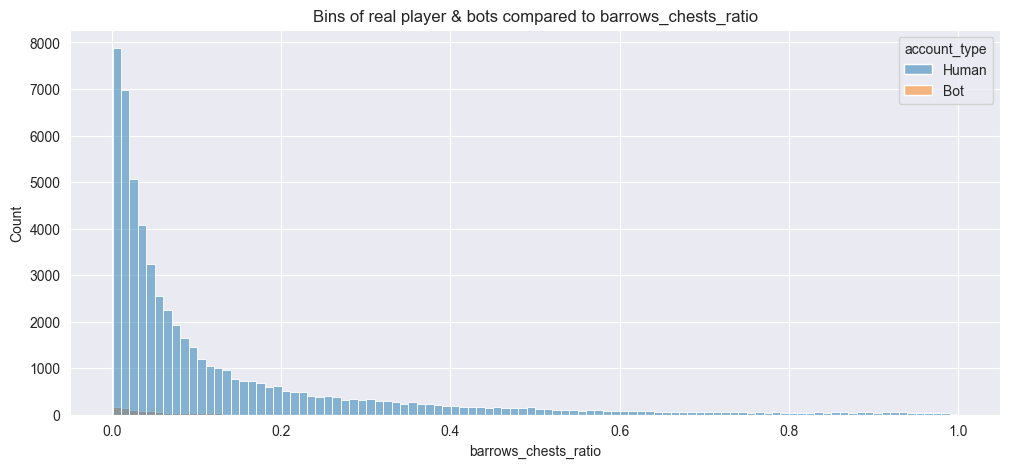

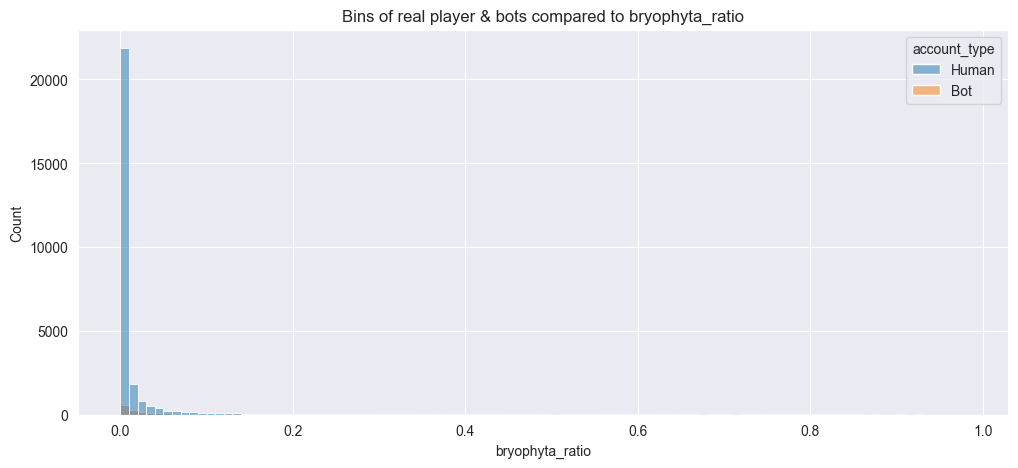

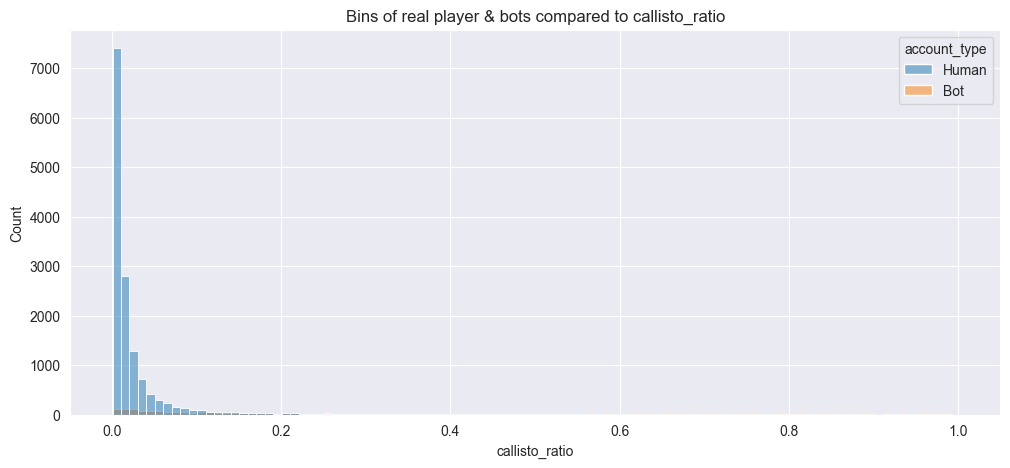

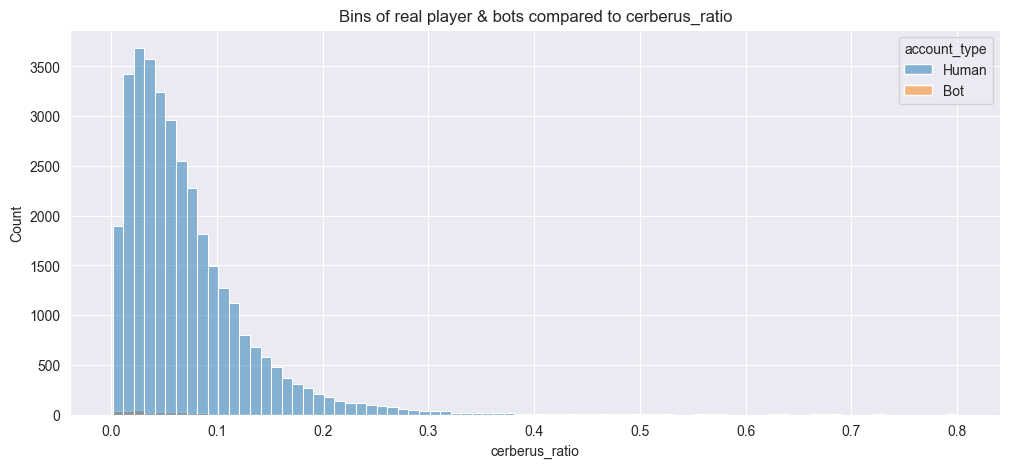

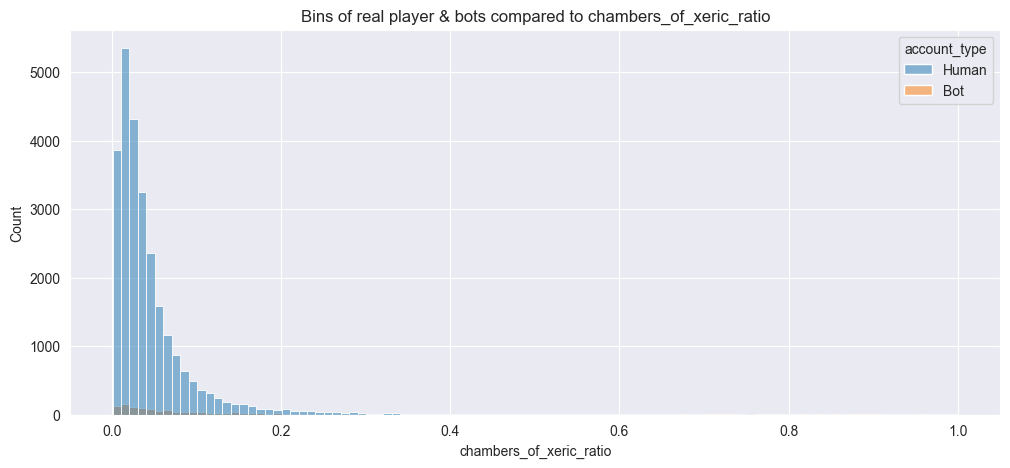

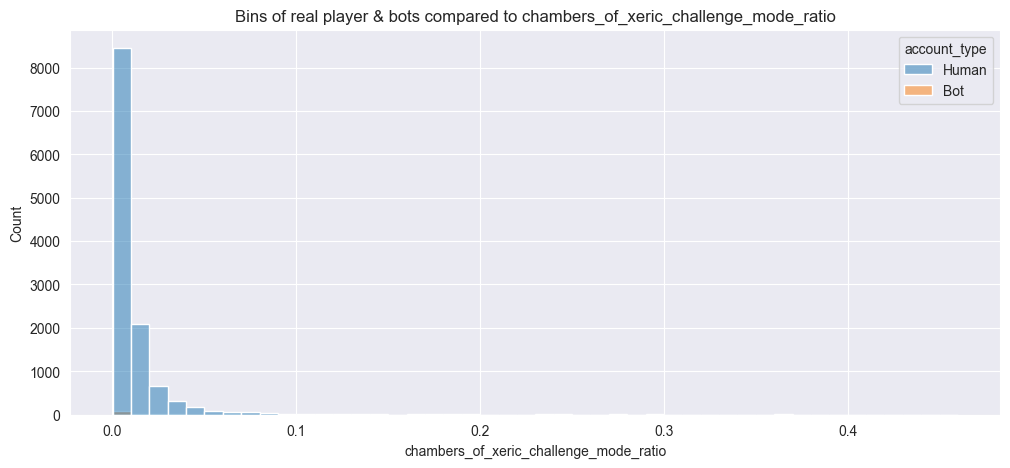

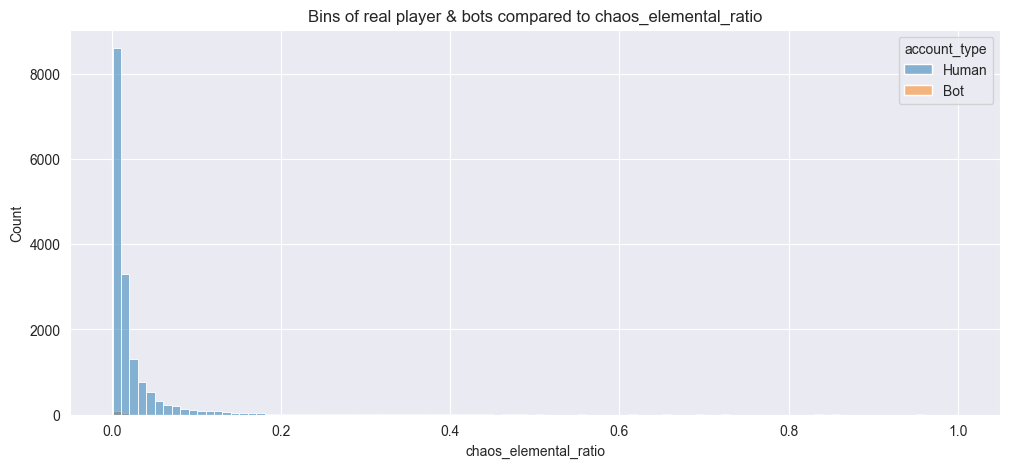

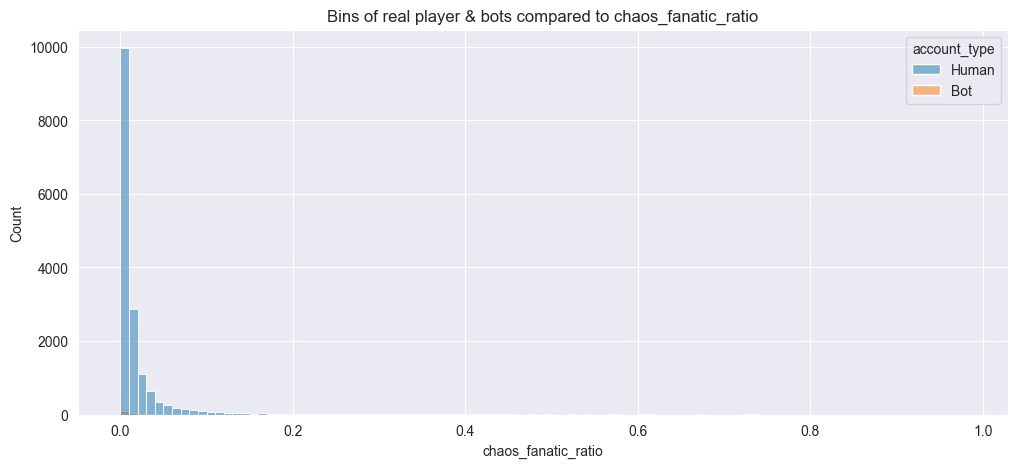

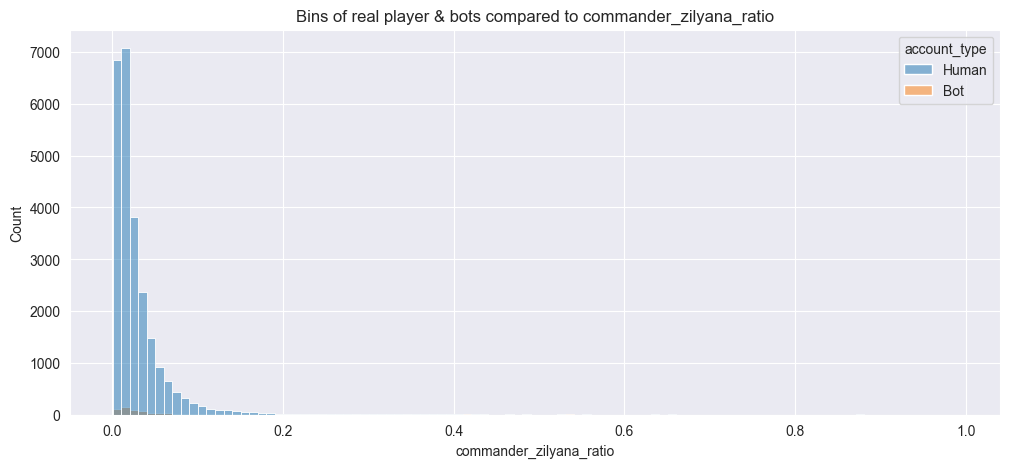

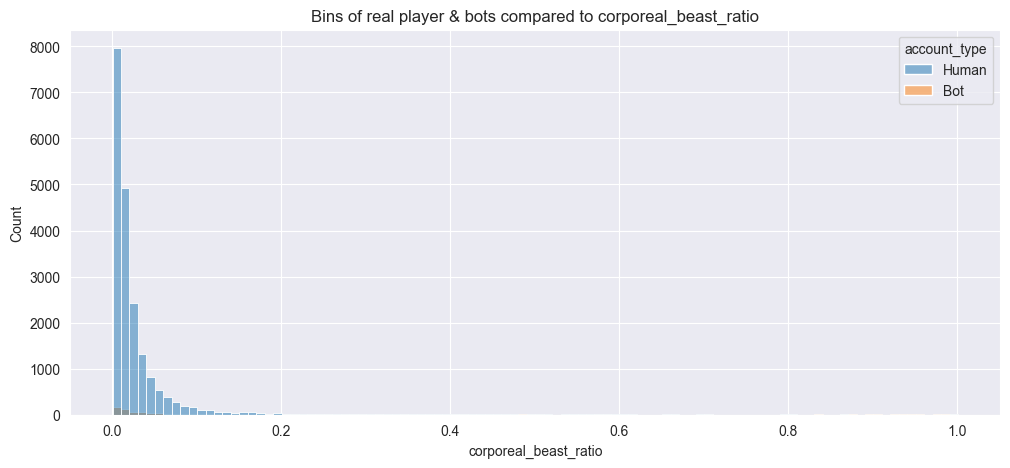

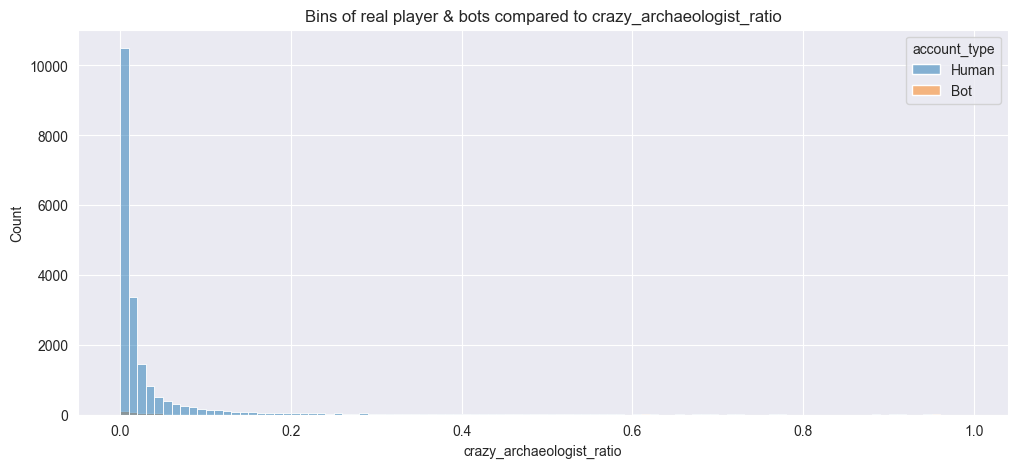

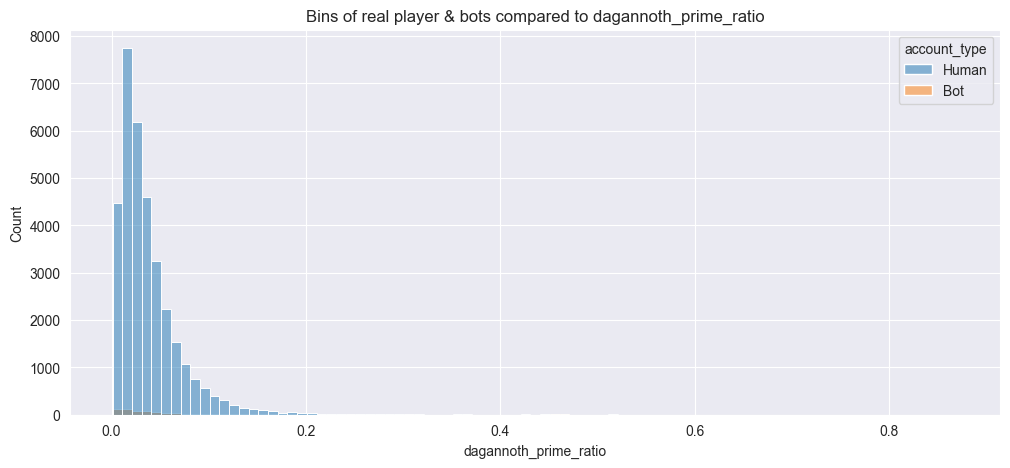

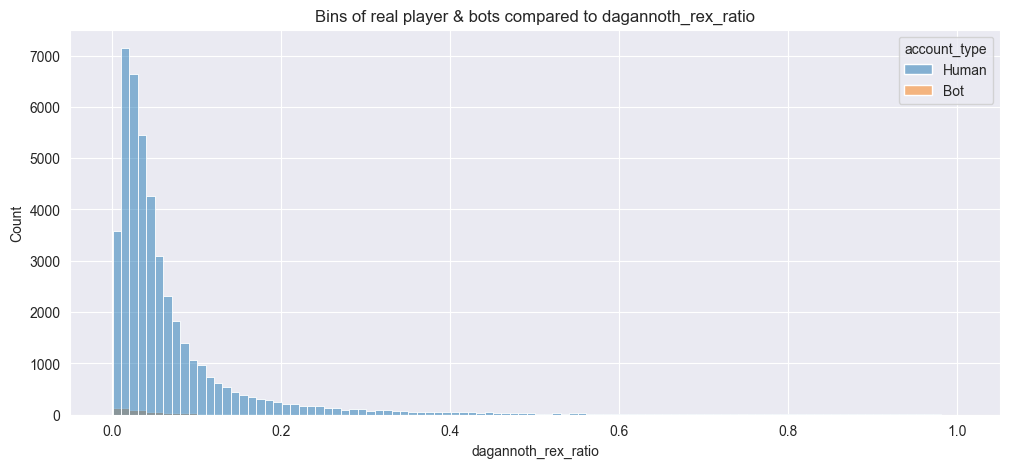

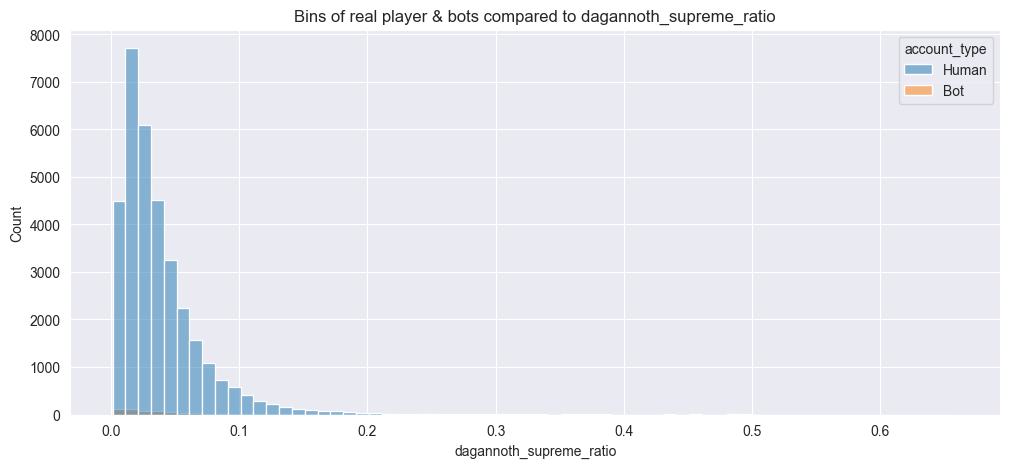

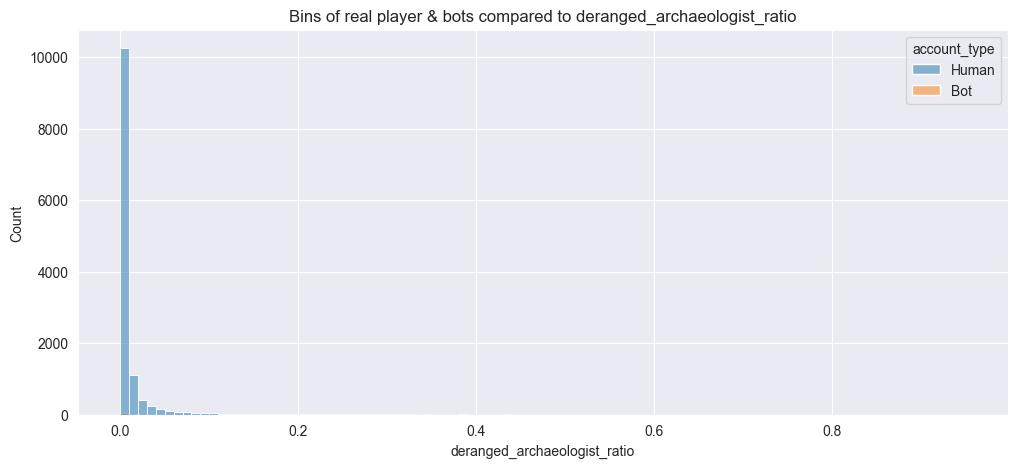

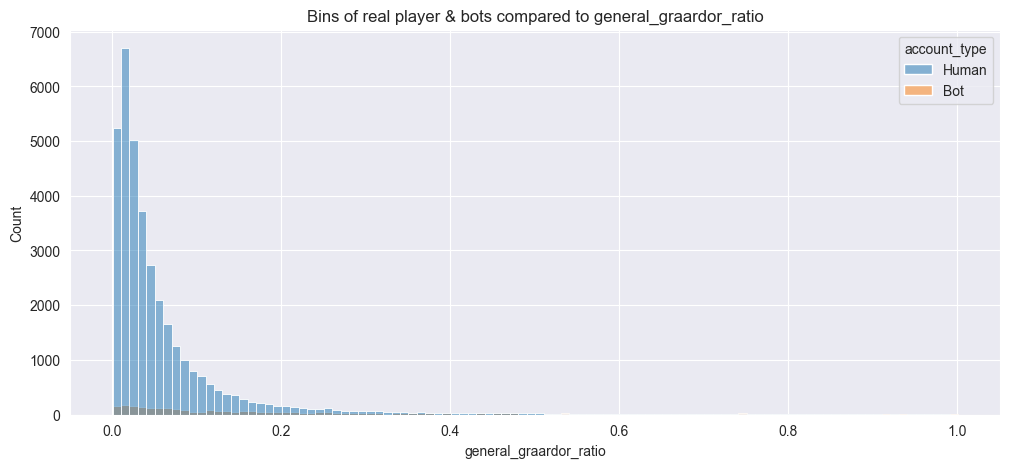

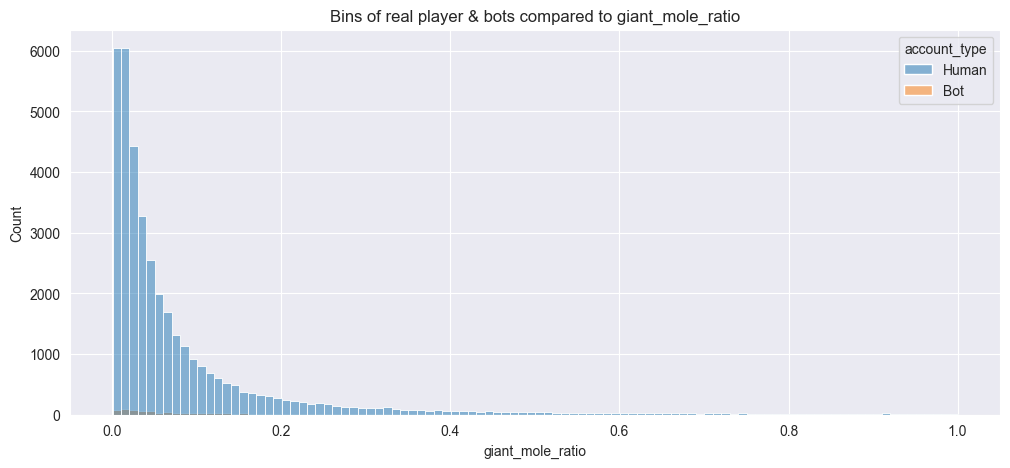

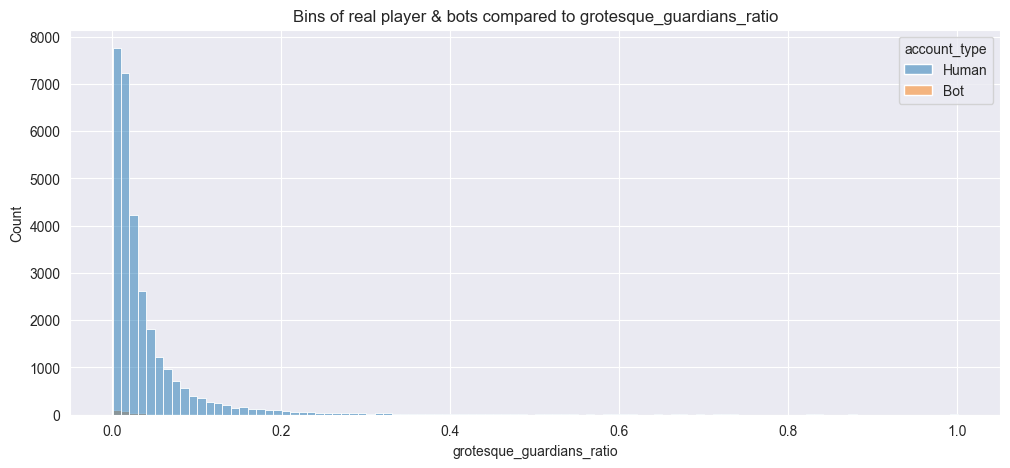

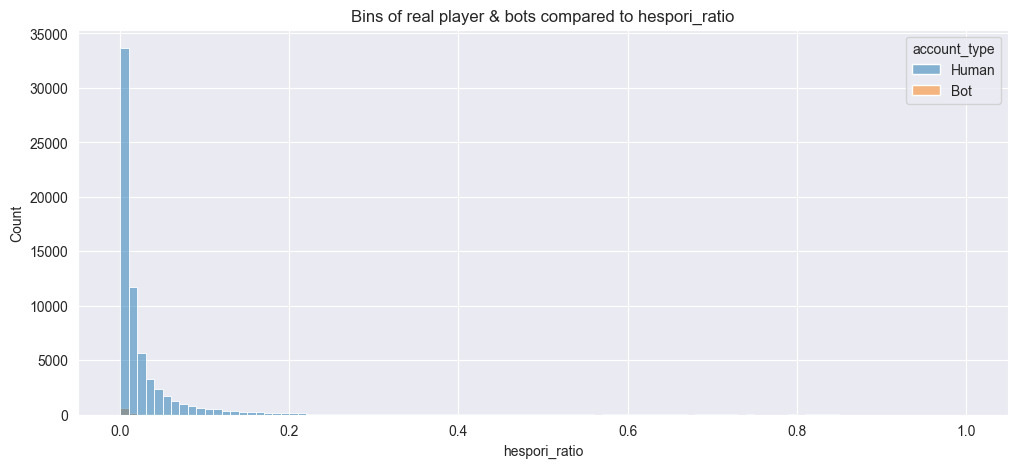

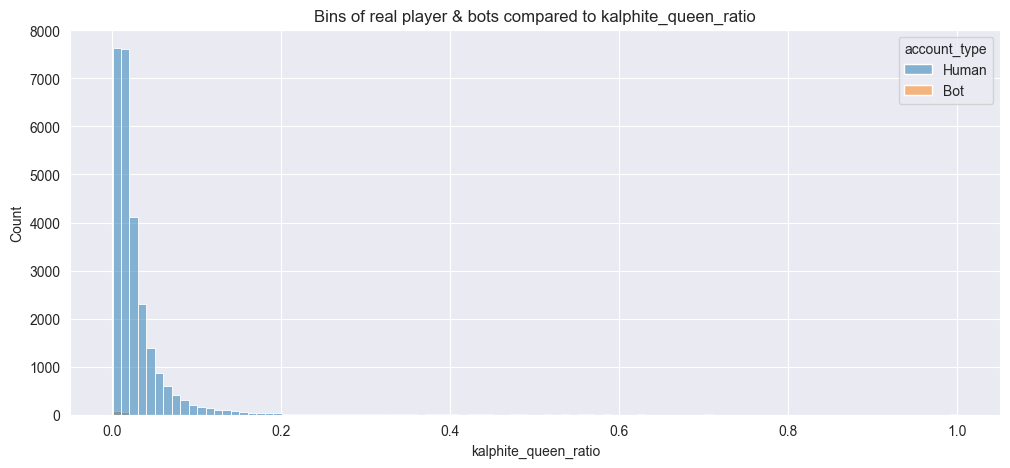

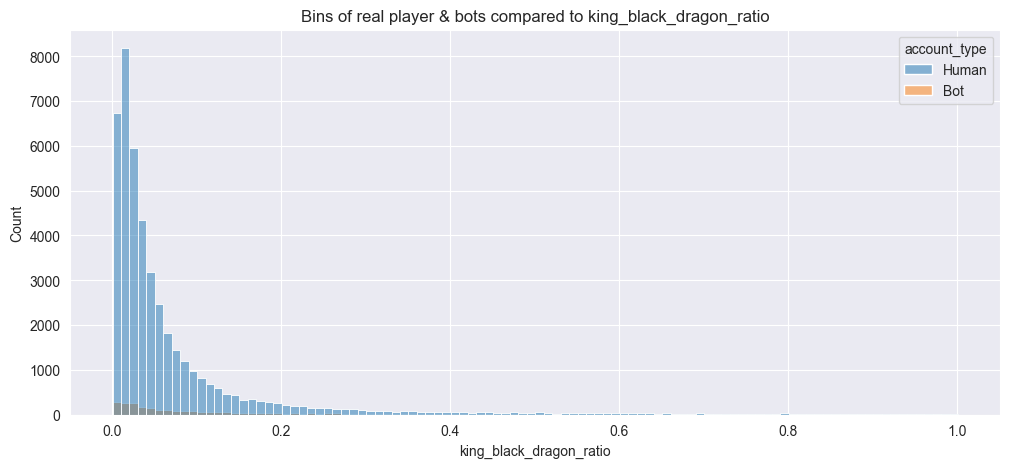

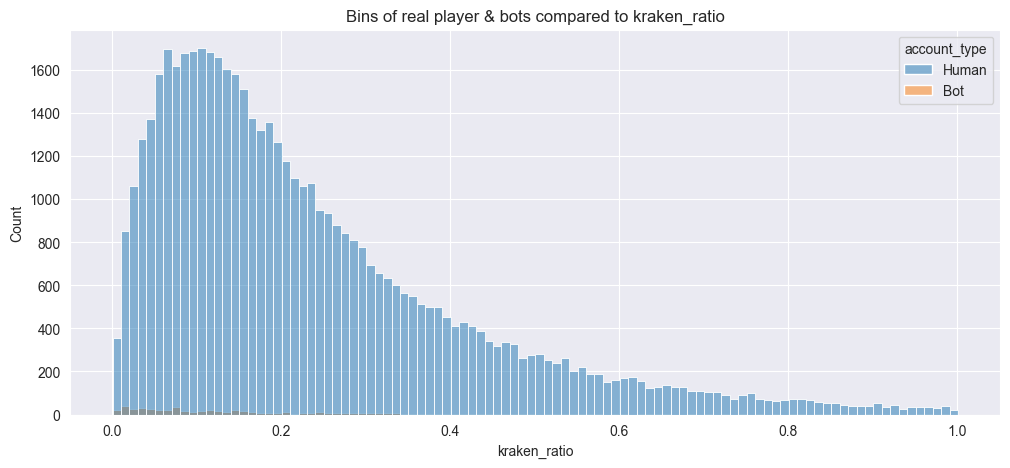

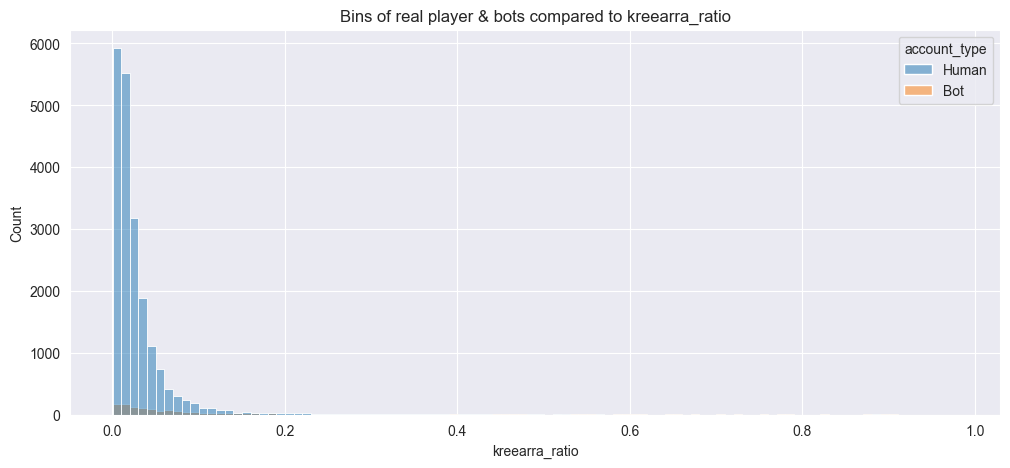

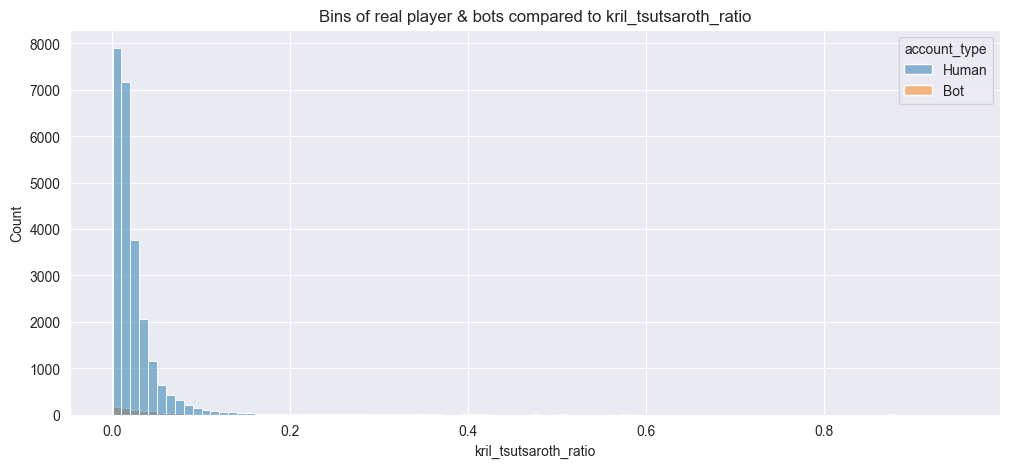

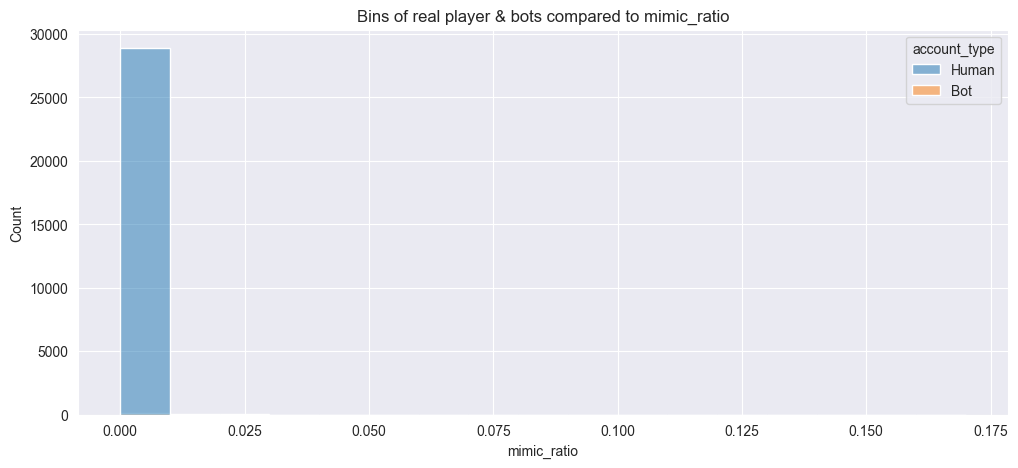

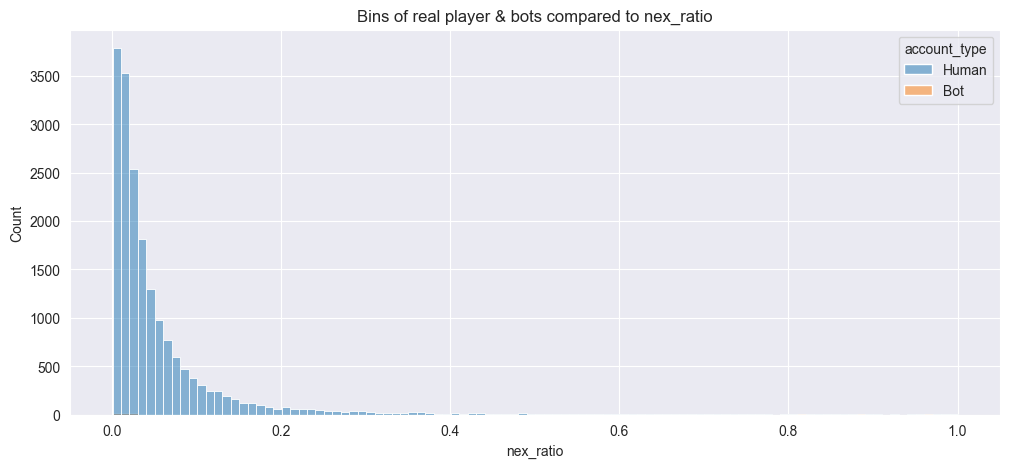

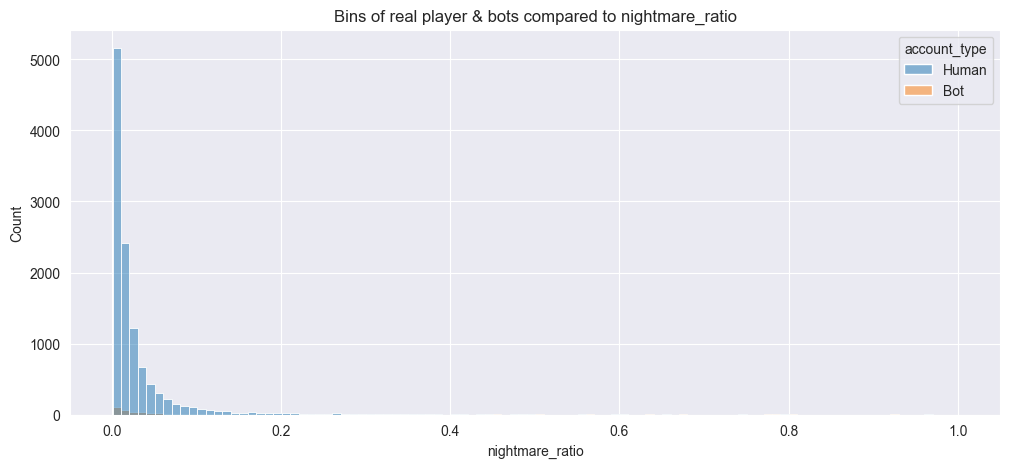

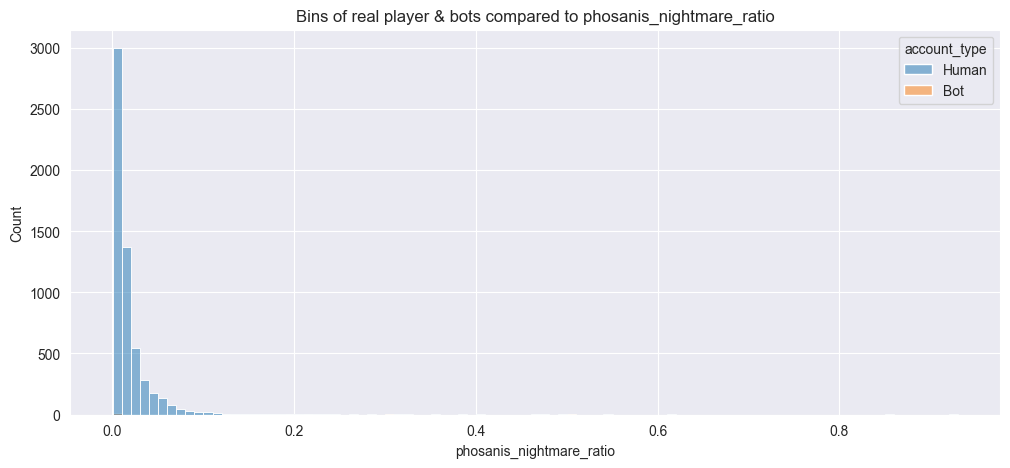

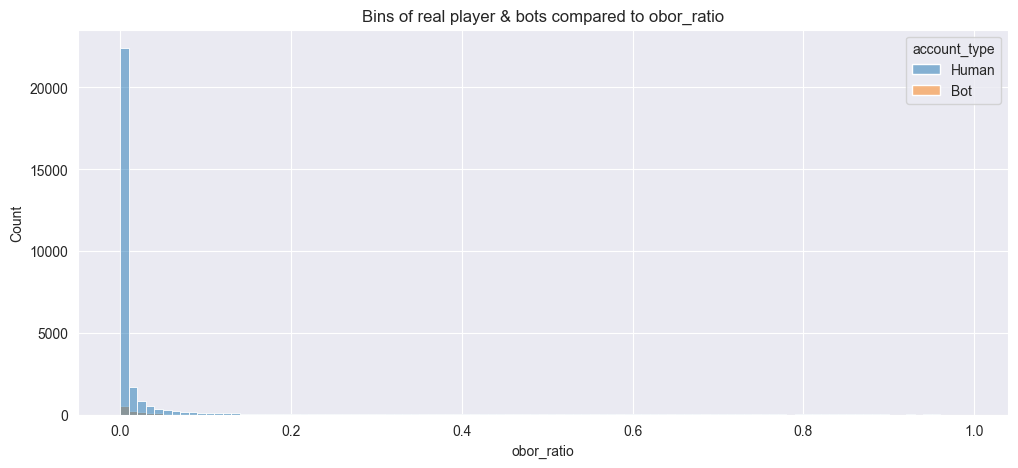

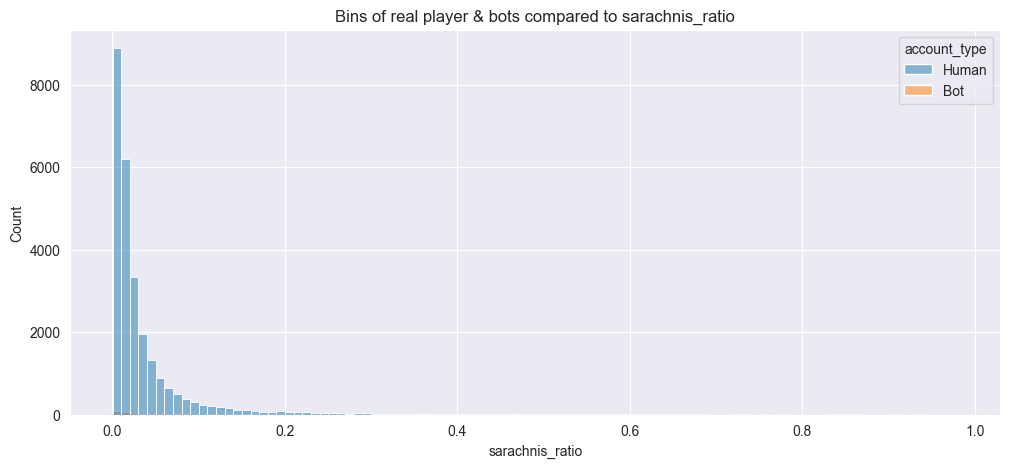

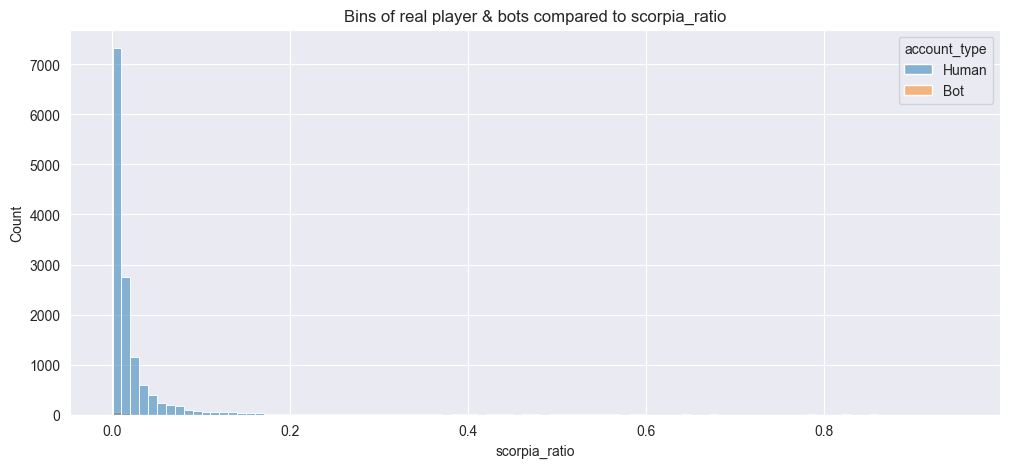

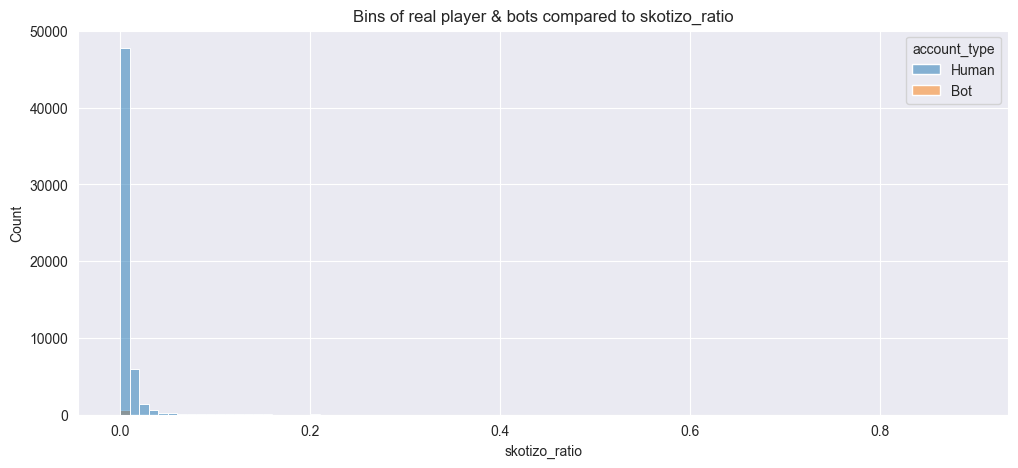

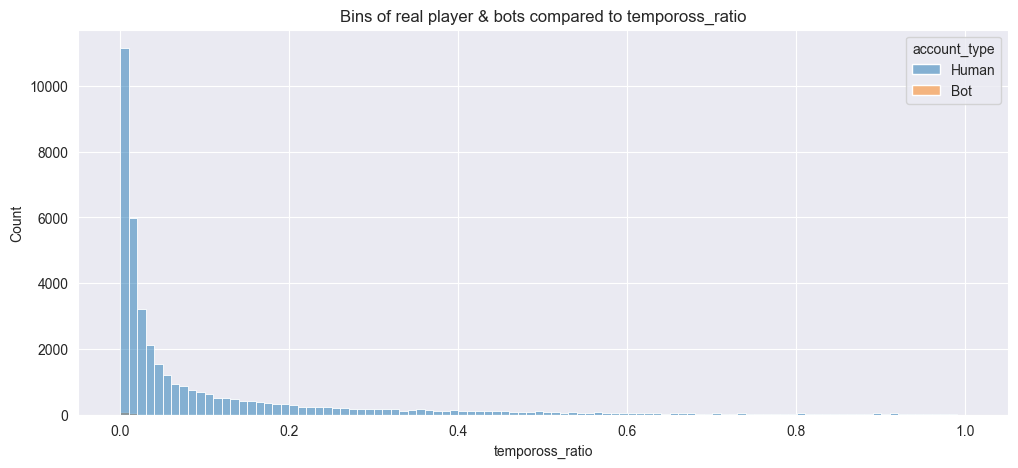

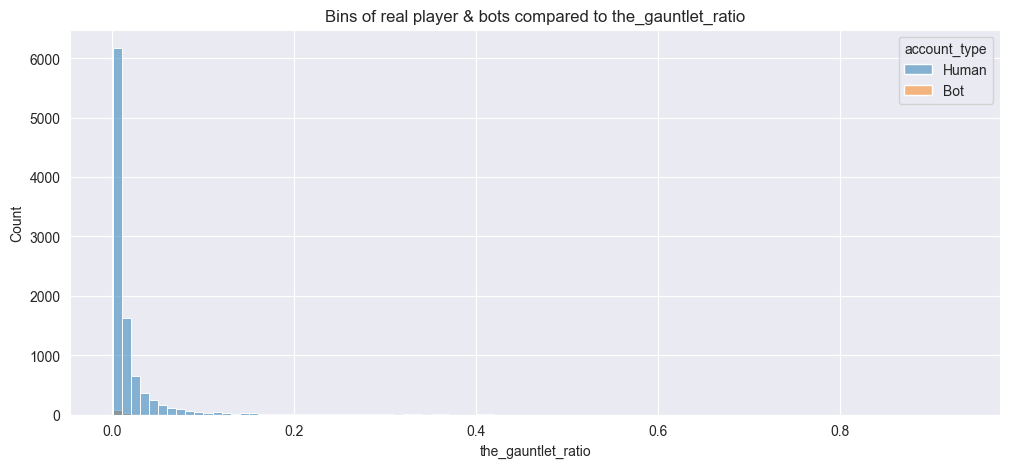

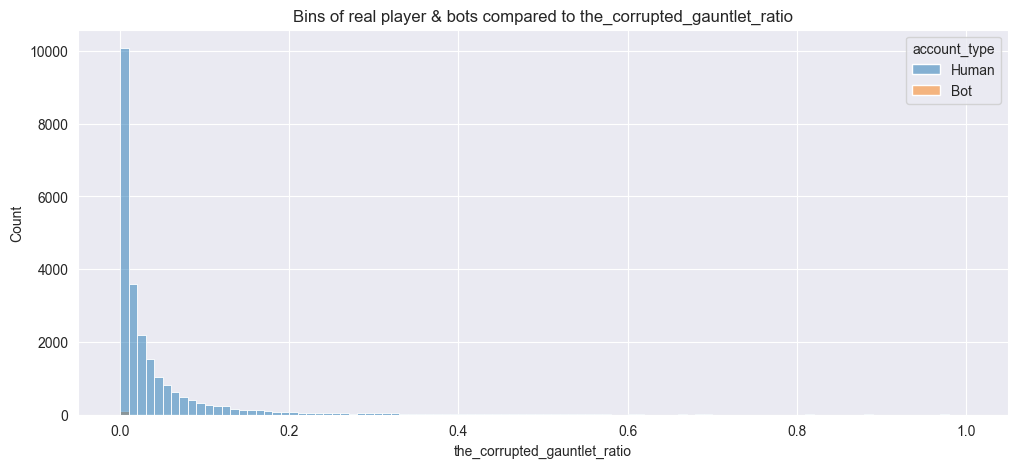

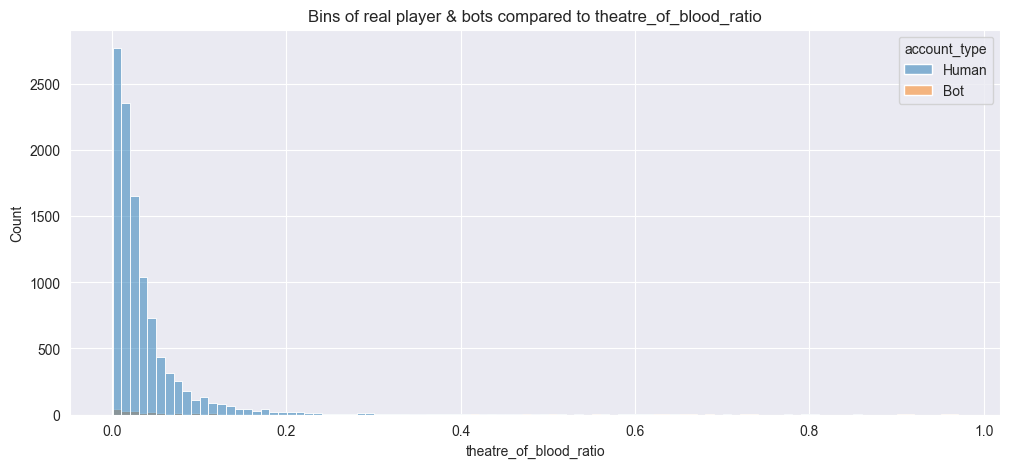

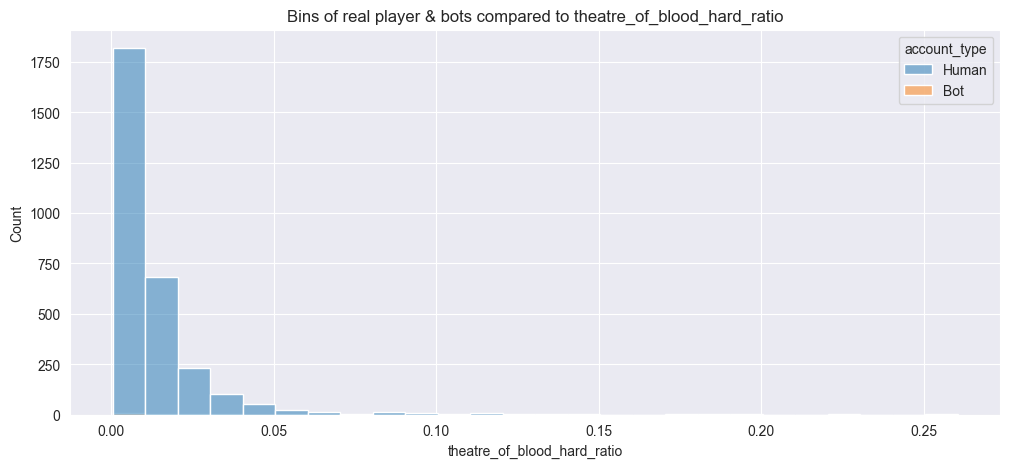

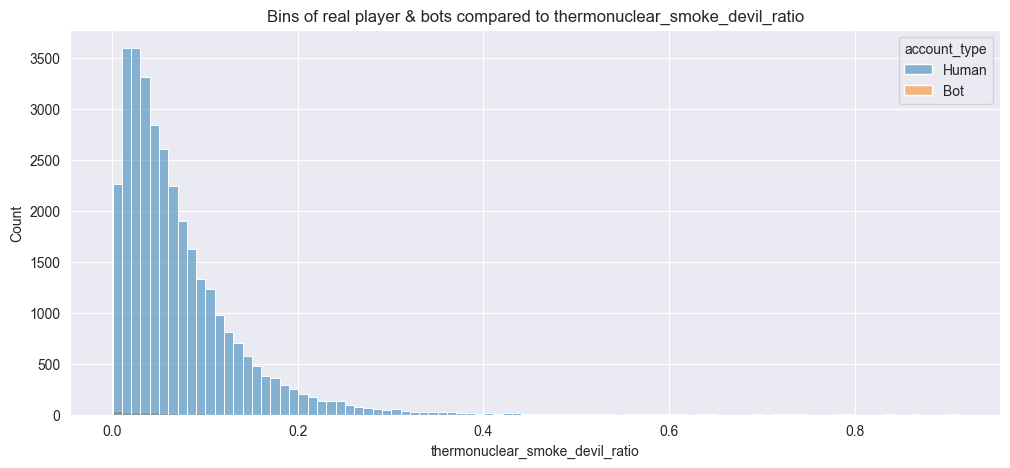

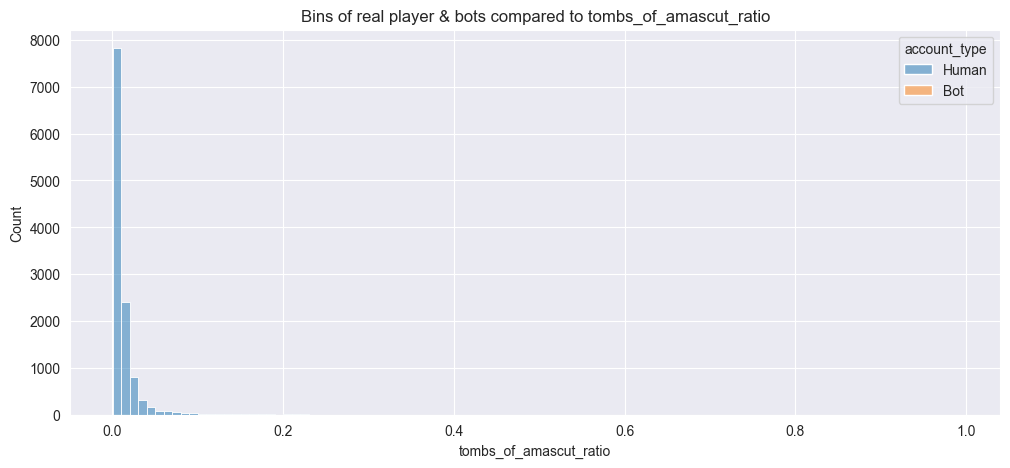

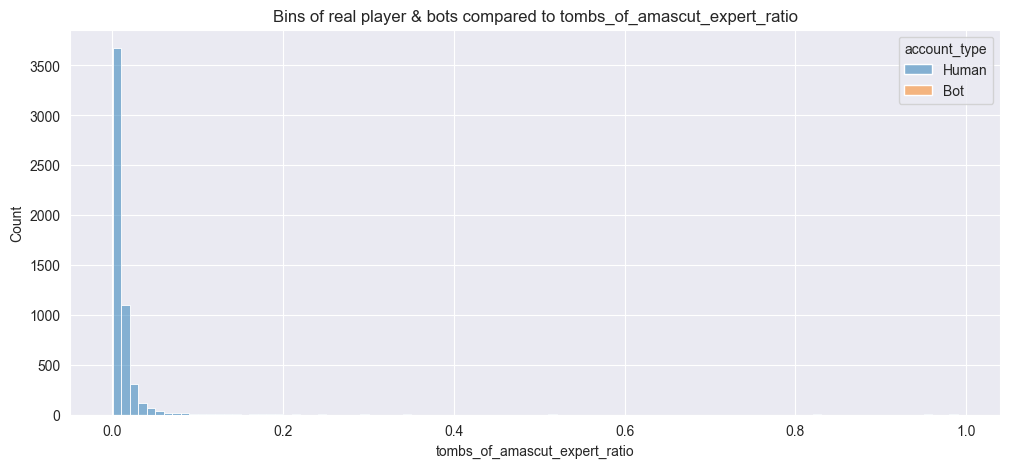

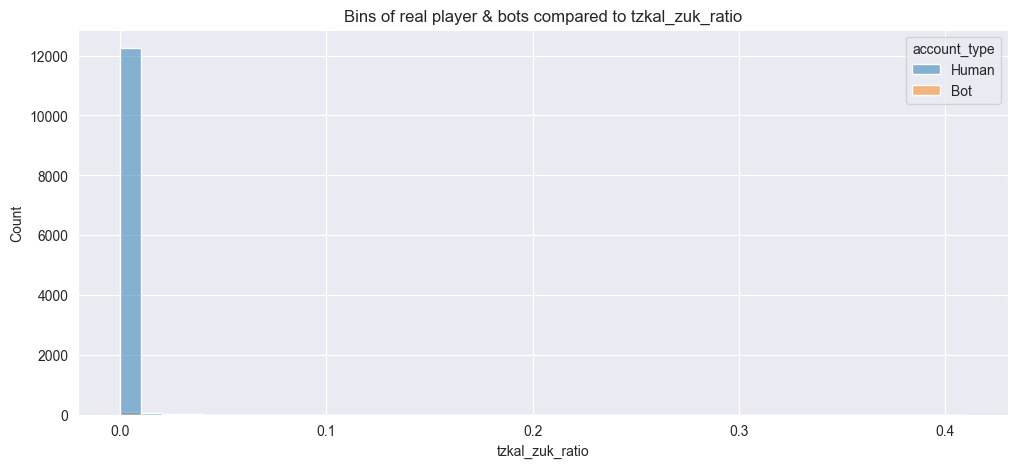

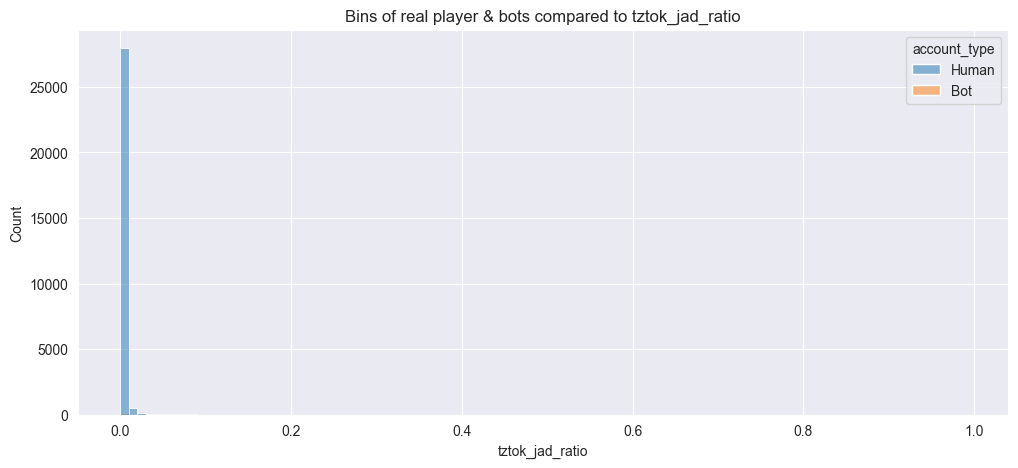

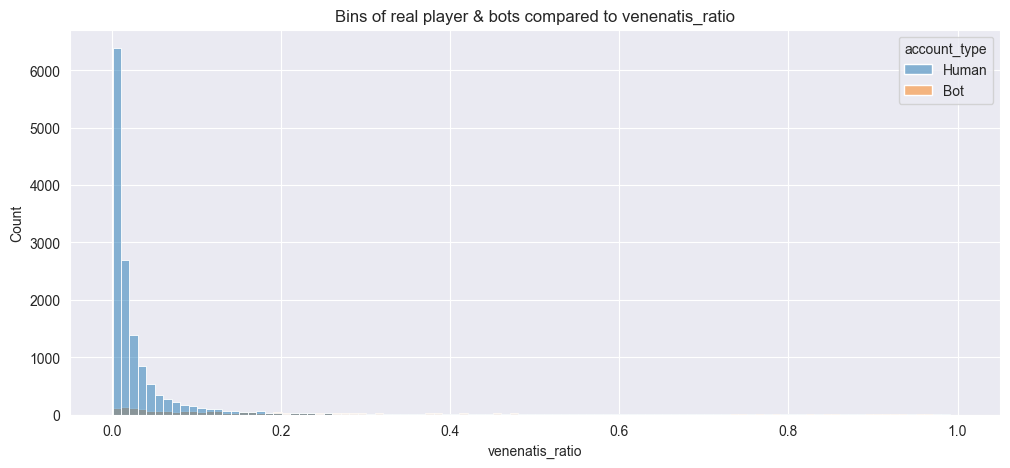

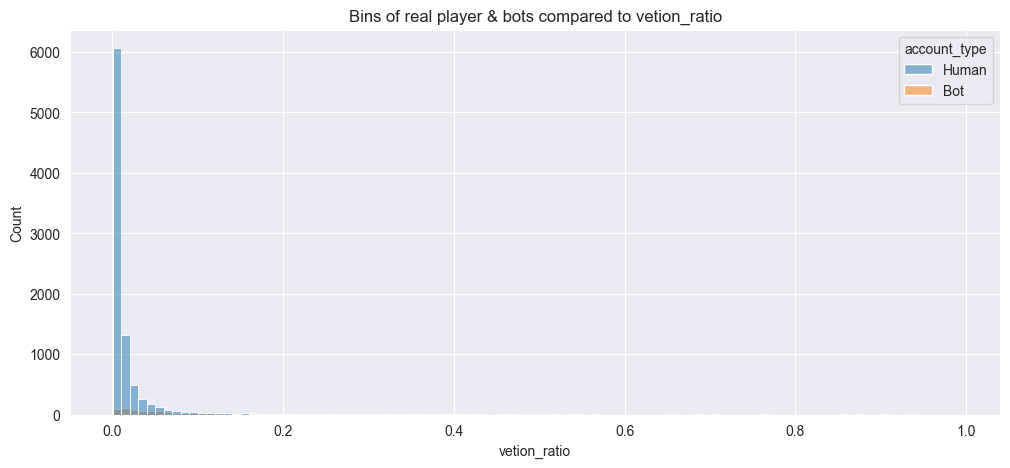

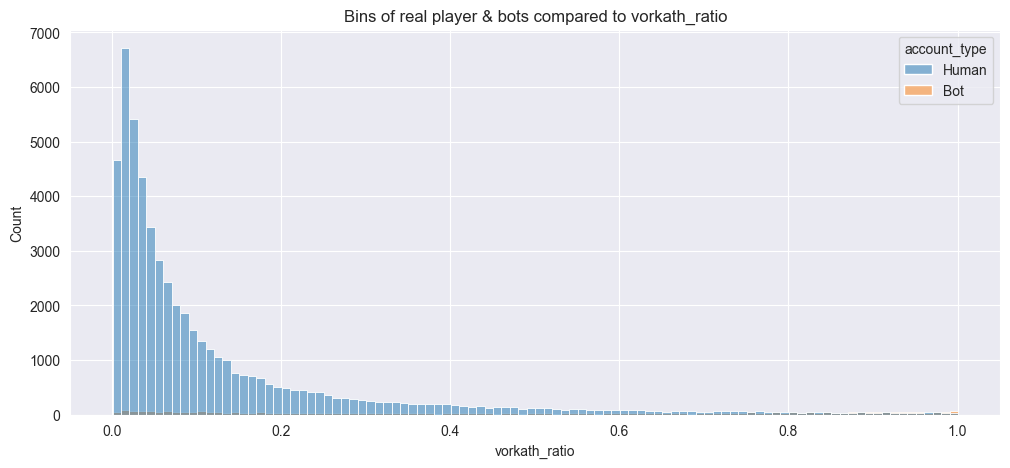

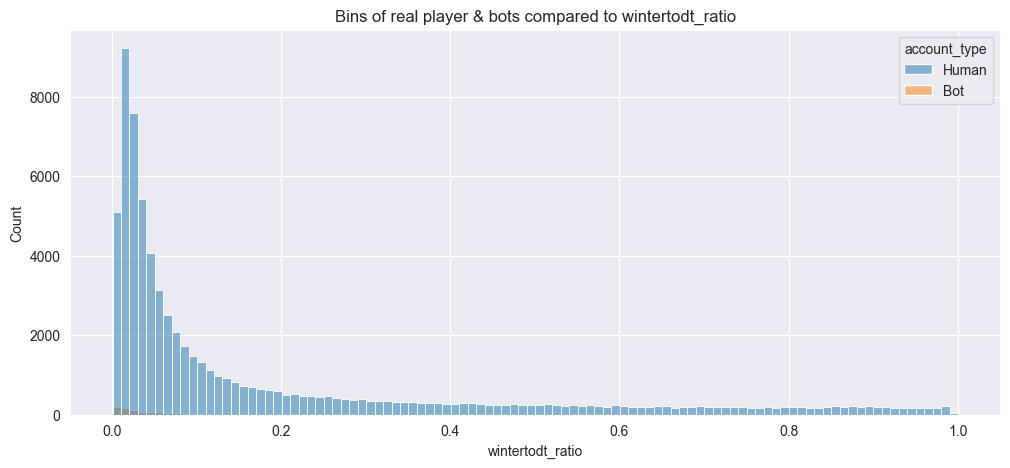

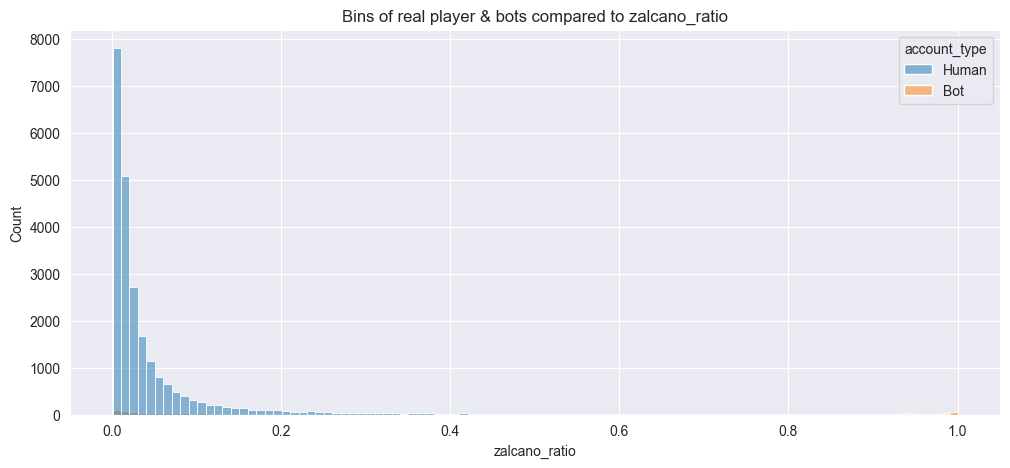

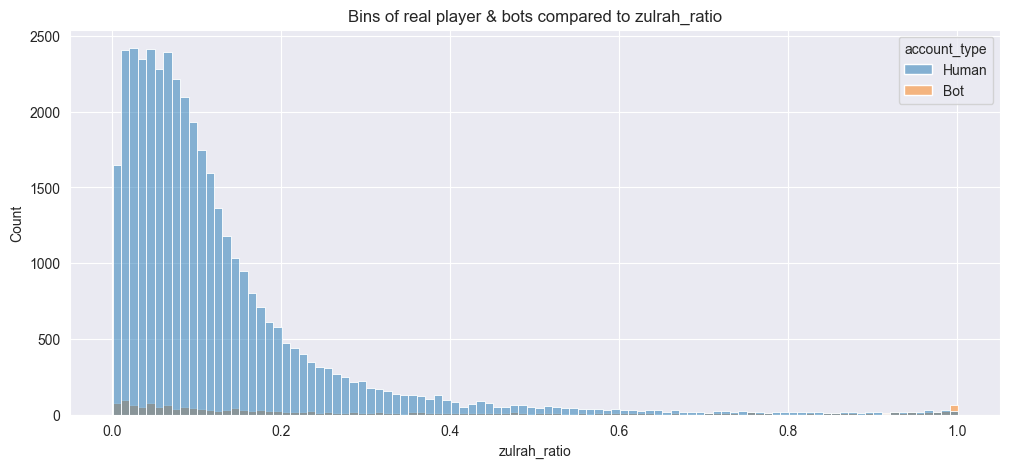

In [59]:
_df = df_player.merge(df_boss_features, left_index=True, right_index=True).copy()
for ratio in df_boss_features.columns:
    if "_ratio" not in ratio:
        continue
    query = f"{ratio} > 0 and {ratio} < 1"
    compare_ratio(ratio, _df.query(query).copy())


# look at minigame ratio real vs bots

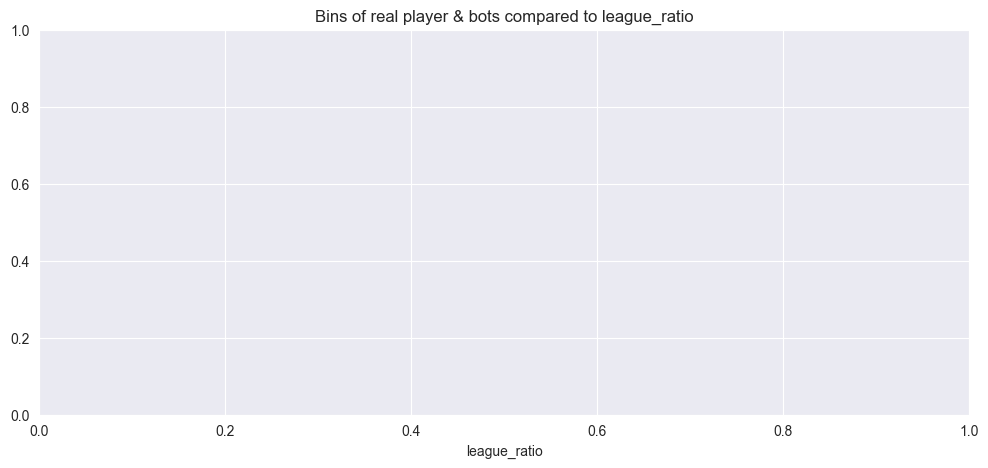

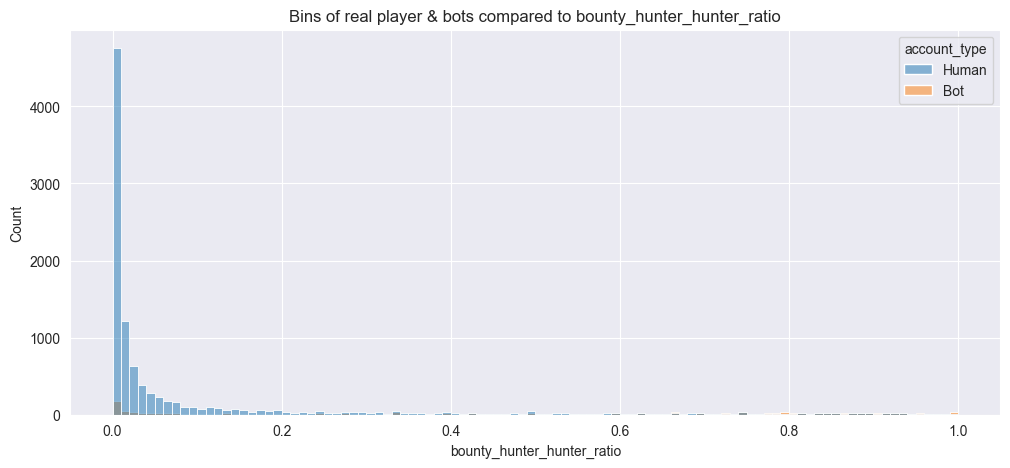

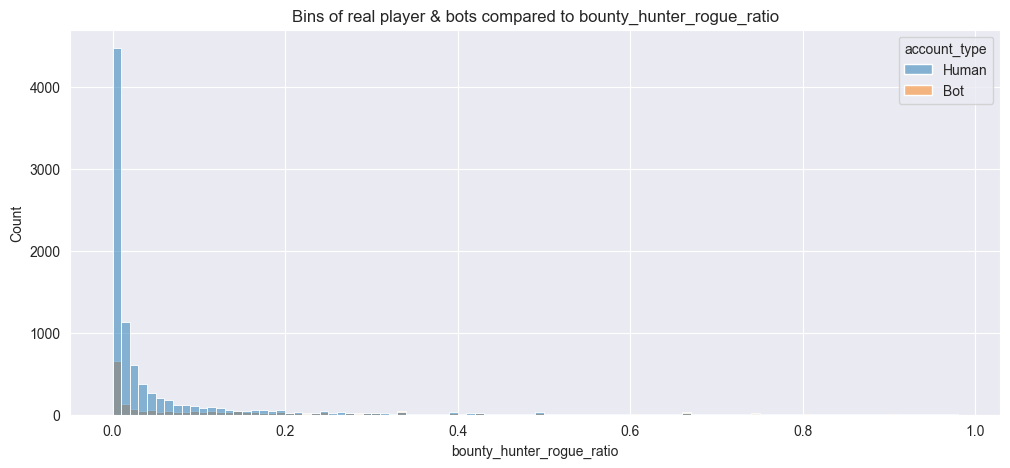

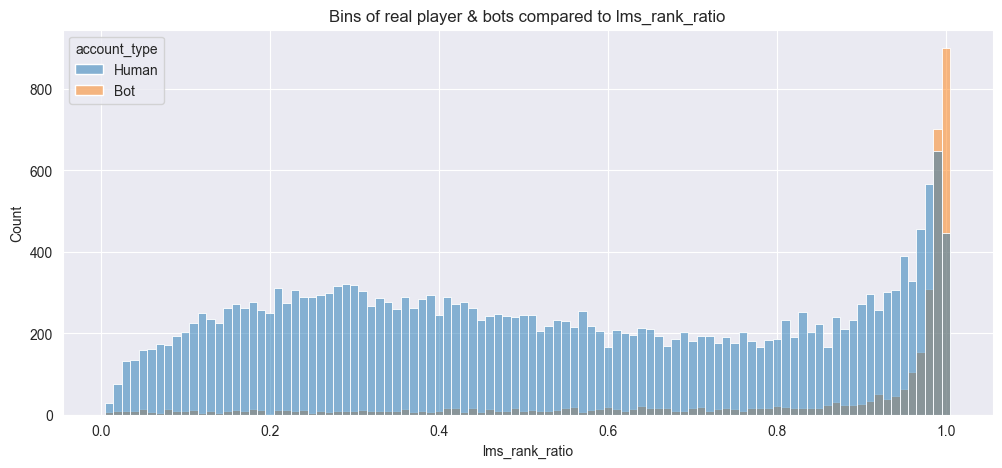

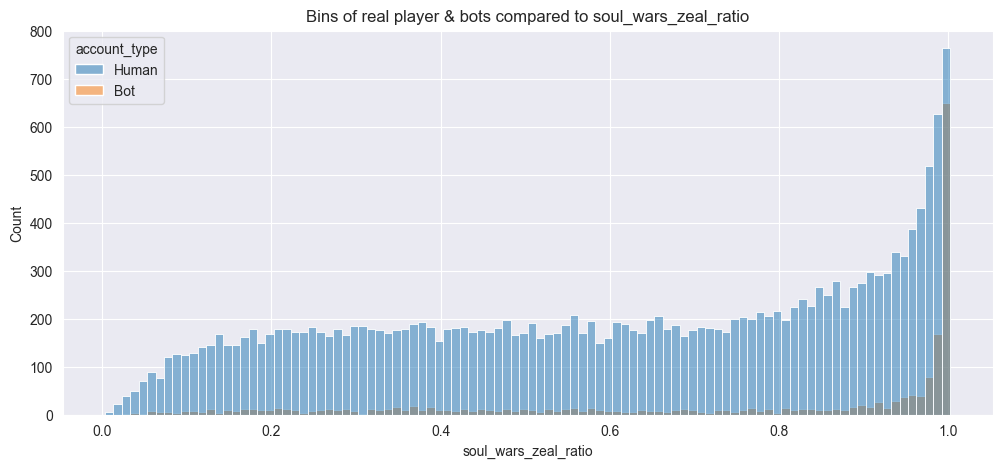

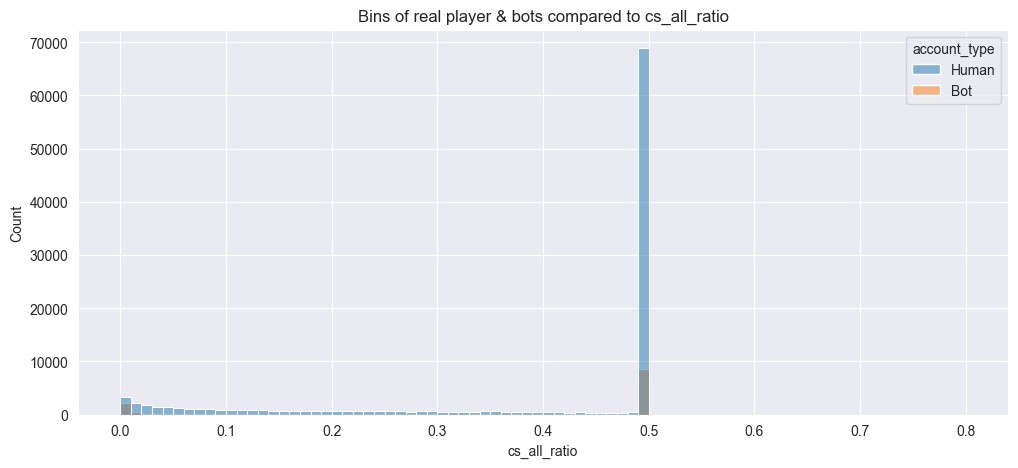

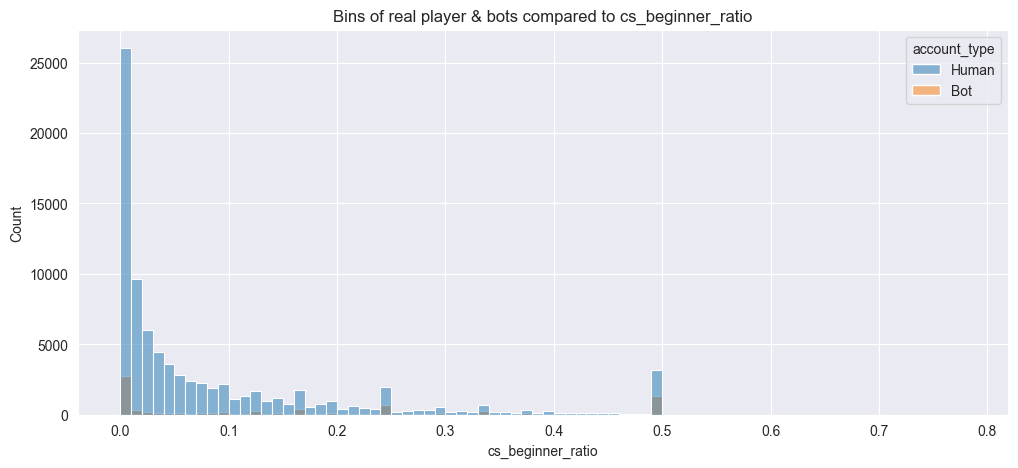

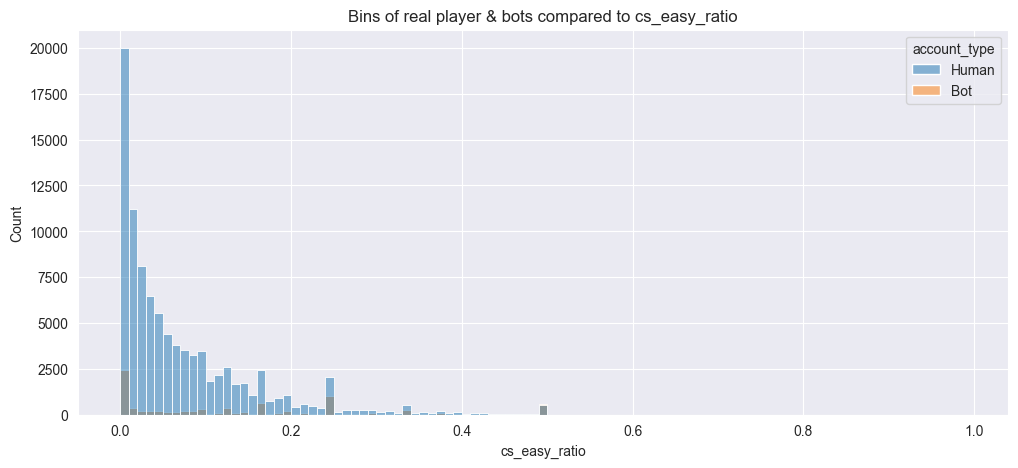

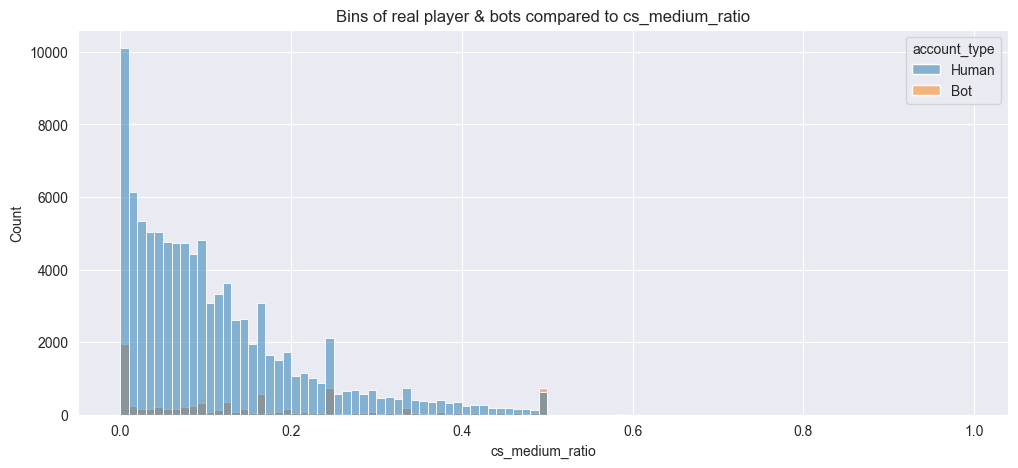

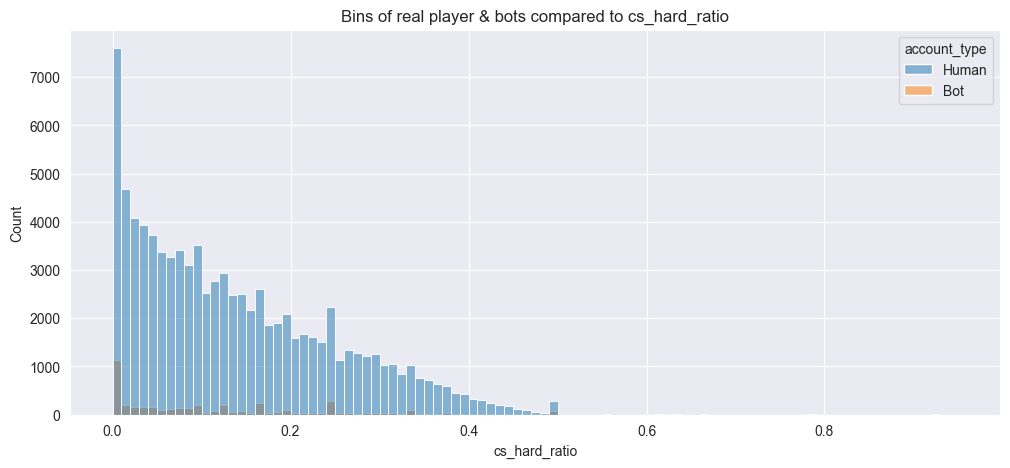

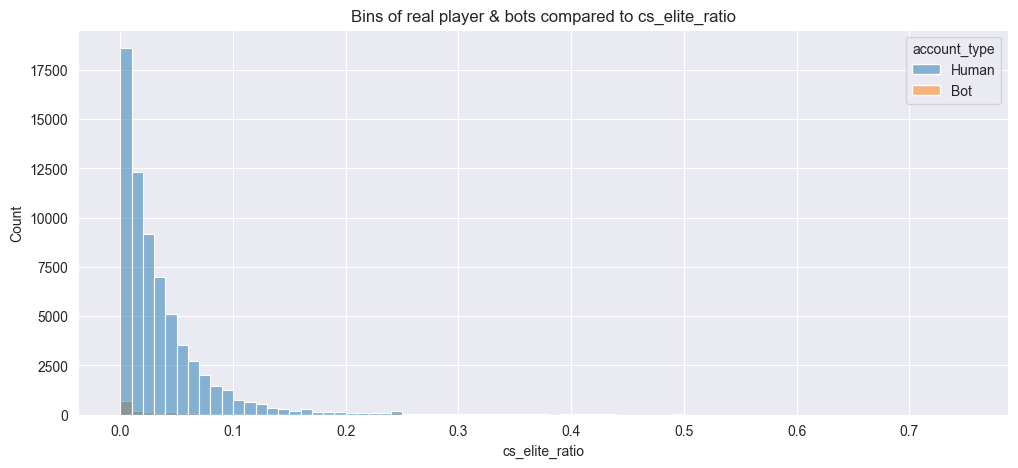

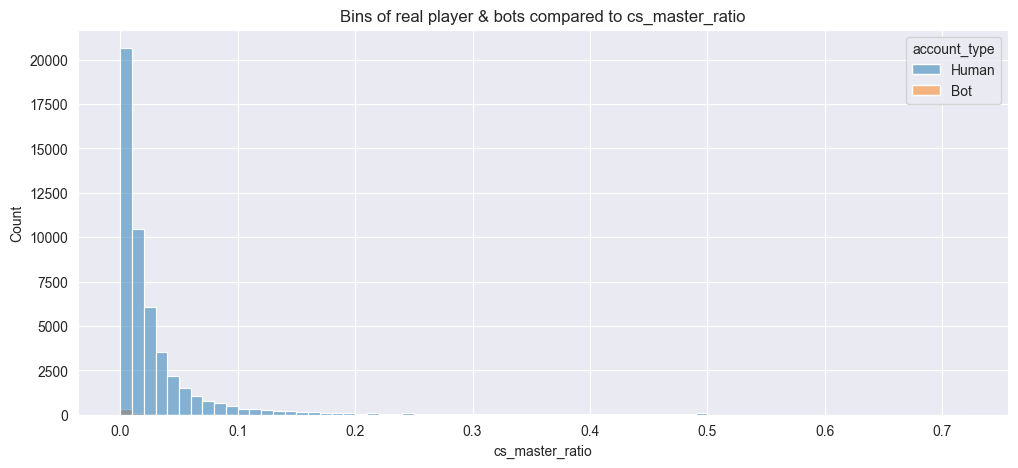

In [60]:
_df = df_player.merge(df_minigames_features, left_index=True, right_index=True).copy()
for ratio in df_minigames_features.columns:
    if "_ratio" not in ratio:
        continue
    query = f"{ratio} > 0 and {ratio} < 1"
    compare_ratio(ratio, _df.query(query).copy())
